# Telecommunications Customer Churn Prediction

## Dataset Overview

**Dataset:** Telco Customer Churn
**Source:** [Kaggle - IBM Sample Dataset](https://www.kaggle.com/blastchar/telco-customer-churn)

### Business Context

Telecommunications companies face significant challenges in customer retention. This dataset provides a comprehensive view of customer characteristics, service usage, and churn patterns, enabling predictive analysis to understand and mitigate customer attrition.

## Dataset Composition

The dataset captures multifaceted customer information across three key dimensions:

### 1. Demographic Insights
- Gender
- Age range
- Relationship status (partner/dependents)

### 2. Service Usage Characteristics
- Service subscriptions (phone, internet)
- Communication service details
- Streaming service preferences
- Multi-line service usage

### 3. Account Dynamics
- Customer tenure
- Contract type
- Payment methods
- Billing preferences
- Monthly charges

## Churn Rate Definition

Churn Rate = (Number of Customers Lost ÷ Total Customers at Start of Period) × 100%

## Project Objectives

### Primary Goals
- Predict customer likelihood of churning
- Identify critical factors influencing customer departure
- Develop actionable strategies for customer retention

### Analytical Approach
1. Exploratory Data Analysis (EDA)
2. Data Preprocessing
3. Predictive Modeling
4. Insights Generation

## Potential Business Value
- Reduce customer acquisition costs
- Enhance customer lifetime value
- Improve targeted retention strategies
- Optimize resource allocation


## Load dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import sqlite3

sns.set()
%matplotlib inline

In [ ]:
def load_customer_data(db_path: str = 'customer_churn.db', 
                      limit: int = None,
                      random_sample: bool = False,
                      specific_columns: list = None,
                      where_clause: str = None) -> pd.DataFrame:
    """
    Load customer churn data from SQLite database into a pandas DataFrame.
    
    Parameters:
    -----------
    db_path : str
        Path to the SQLite database file
    limit : int, optional
        Number of records to retrieve
    random_sample : bool, optional
        If True and limit is specified, returns a random sample
    specific_columns : list, optional
        List of specific columns to retrieve. If None, retrieves all columns
    where_clause : str, optional
        Additional WHERE clause for filtering data
        
    Returns:
    --------
    pd.DataFrame
        DataFrame containing the customer data
    """
    conn = sqlite3.connect(db_path)
    
    try:
        columns = "*" if specific_columns is None else ", ".join(specific_columns)
        
        query = f"SELECT {columns} FROM customer_churn"
        
        if where_clause:
            query += f" WHERE {where_clause}"
            
        if limit is not None:
            if random_sample:
                query += f" ORDER BY RANDOM() LIMIT {limit}"
            else:
                query += f" LIMIT {limit}"
                
        df = pd.read_sql_query(query, conn)
        
        if 'MonthlyCharges' in df.columns:
            df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
        if 'TotalCharges' in df.columns:
            df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
        if 'SeniorCitizen' in df.columns:
            df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
            
        return df
        
    finally:
        conn.close()

# if __name__ == "__main__":
#     df = load_customer_data()
#     print("Full dataset shape:", df.shape)
    
#     df_sample = load_customer_data(limit=100, random_sample=True)
#     print("Random sample shape:", df_sample.shape)
    
#     df_subset = load_customer_data(
#         specific_columns=['customerID', 'MonthlyCharges', 'Churn'],
#         where_clause="Contract = 'Month-to-month'"
#     )
#     print("Subset shape:", df_subset.shape)

Full dataset shape: (7043, 21)
Random sample shape: (100, 21)
Subset shape: (3875, 3)


In [18]:
df_raw = load_customer_data()
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dataset exploration

In [19]:
df_raw.shape # dataset has 7043 records and 21 features

(7043, 21)

In [20]:
df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
# checking null values
df_raw.isnull().any() # Dataset has no null value

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [22]:
# Check for duplicate values
df_raw.duplicated().sum()

np.int64(0)

In [23]:
# type, null/not null and no of records in each feature
df_raw.info() # here we are interested in churn column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning

Here, we are going to rename some columns as well as modifying records with proper format for further analysis.

In [24]:
df_cal = df_raw.copy()
#renaming columns for better understanding
df_cal.rename(columns={'gender':'Gender'
                       ,'customerID':'CustomerID'
                       ,'Contract':'ContractType'
                       ,'InternetService':'InternetServiceType'
                       ,'tenure':'Tenure'
                      }
              ,inplace=True)

In [25]:
#converting categorical values to int withou label encoder for better understanding
df_cal['Partner'] = df_cal.Partner.map({'Yes':1,'No':0})
df_cal['Dependents'] = df_cal.Dependents.map({'Yes':1,'No':0})

df_cal['PhoneService'] = df_cal.PhoneService.map({'Yes':1,'No':0})
df_cal['MultipleLines'] = df_cal.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})

df_cal['InternetService'] = df_cal.InternetServiceType.map({'DSL':1,'Fiber optic':1,'No':0})
df_cal['OnlineSecurity'] = df_cal.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
df_cal['OnlineBackup'] = df_cal.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
df_cal['DeviceProtection'] = df_cal.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
df_cal['TechSupport'] = df_cal.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
df_cal['StreamingTV'] = df_cal.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
df_cal['StreamingMovies'] = df_cal.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})

df_cal['IsContracted'] = df_cal.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})
df_cal['PaperlessBilling'] = df_cal.PaperlessBilling.map({'Yes':1,'No':0})
df_cal['Churn'] = df_cal.Churn.map({'Yes':1,'No':0})


In [27]:
df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted,AnyInternetService
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,One year,0,Mailed check,56.95,1889.50,0,1,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,0


In [28]:
def createAnyInternetService(row):
    if ((row["OnlineSecurity"]==1)| (row['OnlineBackup']==1) | (row['DeviceProtection']==1) | (row['TechSupport']==1) | (row['StreamingTV']==1) | (row['StreamingMovies']==1)):
        return 1
    else:
        return 0 
                
df_cal['AnyInternetService'] = df_cal.apply(lambda row: createAnyInternetService(row), axis = 1)
df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted,AnyInternetService
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,One year,0,Mailed check,56.95,1889.50,0,1,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,0


Here, below output shows the final data structure of the dataset.

- Demographic related information
    - Gender
    - SeniorCitizen
    - Parter
    - Dependents
- Usage related information
    - PhoneService
    - MultipleLines
    - InternetServiceType
    - OnlineSecurity
    - OnlineBackup
    - DeviceProtection
    - TechSupport
    - StreamingTV
    - StreamingMovies
- Account related information
    - Tenure
    - IsContracted
    - ContractType
    - PaperlessBilling
    - PaymentMethod
    - MonthlyCharges
    - TotalCharges
    
Here, <b>Categorical variables</b> are;<br>
Gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, IsContracted, PaperlessBilling, InternetServiceType, ContractType and PaymentMethod;<br>
While <b>numeric  variables</b> are;<br>
Tenure, MonthlyCharges and TotalCharges.

In [29]:
df_cal.dtypes

CustomerID              object
Gender                  object
SeniorCitizen            int64
Partner                  int64
Dependents               int64
Tenure                   int64
PhoneService             int64
MultipleLines            int64
InternetServiceType     object
OnlineSecurity           int64
OnlineBackup             int64
DeviceProtection         int64
TechSupport              int64
StreamingTV              int64
StreamingMovies          int64
ContractType            object
PaperlessBilling         int64
PaymentMethod           object
MonthlyCharges         float64
TotalCharges           float64
Churn                    int64
InternetService          int64
IsContracted             int64
AnyInternetService       int64
dtype: object

In [30]:
categorical_cols = ["Gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines"
                    ,"OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV"
                    ,"StreamingMovies","IsContracted","PaperlessBilling","InternetServiceType"
                    ,"ContractType","PaymentMethod"]

num_cols = ["Tenure","MonthlyCharges","TotalCharges"]

In [31]:
df_cal[categorical_cols].describe(include='all')

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,IsContracted,PaperlessBilling,InternetServiceType,ContractType,PaymentMethod
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,7043
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,4
top,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiber optic,Month-to-month,Electronic check
freq,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3096,3875,2365
mean,NaN,0.162147,0.483033,0.299588,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.449808,0.592219,NaN,NaN,NaN
std,NaN,0.368612,0.499748,0.458110,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.497510,0.491457,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN
75%,NaN,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN


In [32]:
df_cal[num_cols].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [33]:
df_cal.shape

(7043, 24)

## EDA - Exploratory Data Analysis

So far, we know that telco data has 7043 customers' data with 24 features (including 3 calculative features which we added) and has information related to demographic, usage and account types.

Our next objective would be,

- Calculate churn rate
- Find out the features which helps distinguise churn customers and existing customers
     - Distribution of features<br>
     - Correlation between features<br>
     - Clusturing in churn customers<br>
       

In [34]:
# Calculate churn rate of telco company's dataset

Churn_rate = df_cal['Churn'].value_counts() / df_cal.shape[0]
print(Churn_rate)

# from output, churn rate is around 26%

Churn
0    0.73463
1    0.26537
Name: count, dtype: float64


#### Churn vs existing customer 

Our hypothesis is that customer left company because of 
- High monthly charges
- Poor customer service
- Better compatitor offers

From above reasons and based on our dataset, we can varify first reason. 

And from below analysis,
- We verified that our first hypothesis is true - Customer left company because of high monthly charges.
- Most common characteristics in churn customers are that the subscriber have internet service usage, paperless billing method and electronic check payment method and month-to-month contract type with company.

In [45]:
group = df_cal.groupby('Churn')
group.groups

{0: [0, 1, 3, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 19, 21, 23, 24, 25, 28, 30, 31, 32, 33, 34, 35, 37, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 52, 54, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 111, 112, 114, 115, 116, 118, 119, 120, 121, 123, 124, 125, 127, 128, 129, ...], 1: [2, 4, 5, 8, 13, 18, 20, 22, 26, 27, 29, 36, 38, 39, 47, 51, 53, 55, 64, 80, 82, 95, 97, 99, 104, 110, 113, 117, 122, 126, 131, 133, 134, 139, 141, 147, 151, 161, 166, 168, 171, 173, 176, 177, 180, 182, 184, 185, 191, 207, 208, 210, 220, 223, 227, 232, 235, 238, 247, 248, 251, 252, 258, 260, 261, 268, 270, 272, 274, 275, 276, 284, 287, 288, 289, 290, 299, 301, 306, 314, 317, 318, 320, 327, 333, 334, 335, 336, 339, 346, 353, 354, 355, 358, 365, 371, 377, 381, 383, 385, ...]}

In [46]:
# calculate mean summary of customers (Churn vs non churn). 
churn_summary = df_cal.groupby('Churn')[['Tenure', 'MonthlyCharges']].mean()
print(churn_summary)


          Tenure  MonthlyCharges
Churn                           
0      37.569965       61.265124
1      17.979133       74.441332


In [83]:
def categorical_var_churn_dist(feature, filterFea=''):
    """
    Analyze and visualize the distribution of a categorical variable 
    across churned and non-churned customer groups.
    
    Parameters:
    -----------
    feature : str
        Categorical column to analyze
    filterFea : str, optional
        Additional filter to apply before analysis
    """
    # Determine the data subset
    if filterFea != '':
        # Filter the dataframe based on the additional feature
        subset = df_cal[df_cal[filterFea] == 1]
        feature_summary = subset.groupby('Churn')[feature].value_counts(normalize=True).reset_index(name='Percentage')
        title_suffix = f' (Filtered by {filterFea})'
    else:
        feature_summary = df_cal.groupby('Churn')[feature].value_counts(normalize=True).reset_index(name='Percentage')
        title_suffix = ''
    
    # Print summary
    print(f"{feature} Churn Distribution Summary{title_suffix}:")
    print(feature_summary)
    
    # Additional statistical insight
    churn_rates = df_cal.groupby(feature)['Churn'].mean().sort_values(ascending=False)
    print("\nChurn Rates by", feature)
    print(churn_rates)
    
    # Create visualization
    plt.figure(figsize=(15, 6))
    
    # Subplot for Non-Churned Customers
    plt.subplot(1, 2, 1)
    non_churned = feature_summary[feature_summary['Churn'] == 0]
    sns.barplot(
        data=non_churned, 
        x=feature, 
        y='Percentage', 
        hue=feature,  
        legend=False,  
        palette='viridis', 
        alpha=0.7
    )
    plt.title(f'{feature} Distribution - Non-Churned Customers{title_suffix}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Percentage', fontsize=10)
    plt.xticks(rotation=45, ha='right')
    
    # Subplot for Churned Customers
    plt.subplot(1, 2, 2)
    churned = feature_summary[feature_summary['Churn'] == 1]
    sns.barplot(
        data=churned, 
        x=feature, 
        y='Percentage', 
        hue=feature,  
        legend=False,  
        palette='rocket', 
        alpha=0.7
    )
    plt.title(f'{feature} Distribution - Churned Customers{title_suffix}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Percentage', fontsize=10)
    plt.xticks(rotation=45, ha='right')
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

Gender Churn Distribution Summary:
   Churn  Gender  Percentage
0      0    Male    0.507344
1      0  Female    0.492656
2      1  Female    0.502408
3      1    Male    0.497592

Churn Rates by Gender
Gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64


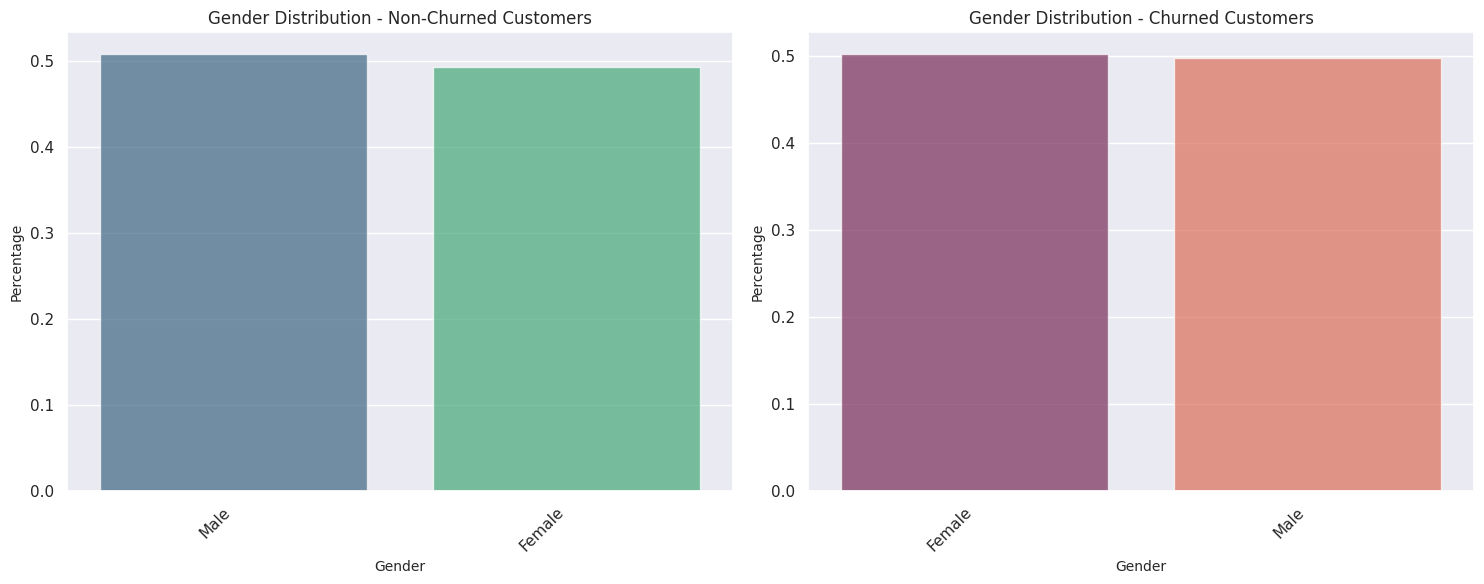

In [84]:
categorical_var_churn_dist('Gender')

### Gender Churn Analysis

#### Distribution Breakdown

1. **Non-Churned Customers**:
   - Male: 50.73%
   - Female: 49.27%

2. **Churned Customers**:
   - Female: 50.24%
   - Male: 49.76%

#### Churn Rates
- Female Churn Rate: 26.92%
- Male Churn Rate: 26.16%

### Key Insights

1. **Minimal Gender Difference**
   - The distribution of males and females is almost equally balanced
   - Very slight variation in churn rates

2. **Churn Rate Comparison**
   - Females have a marginally higher churn rate (+0.76%)
   - The difference is relatively insignificant

### Practical Implications
- Gender does not appear to be a strong predictor of customer churn
- Other factors likely play a more important role in customer retention

SeniorCitizen Churn Distribution Summary:
   Churn  SeniorCitizen  Percentage
0      0              0    0.871279
1      0              1    0.128721
2      1              0    0.745318
3      1              1    0.254682

Churn Rates by SeniorCitizen
SeniorCitizen
1    0.416813
0    0.236062
Name: Churn, dtype: float64


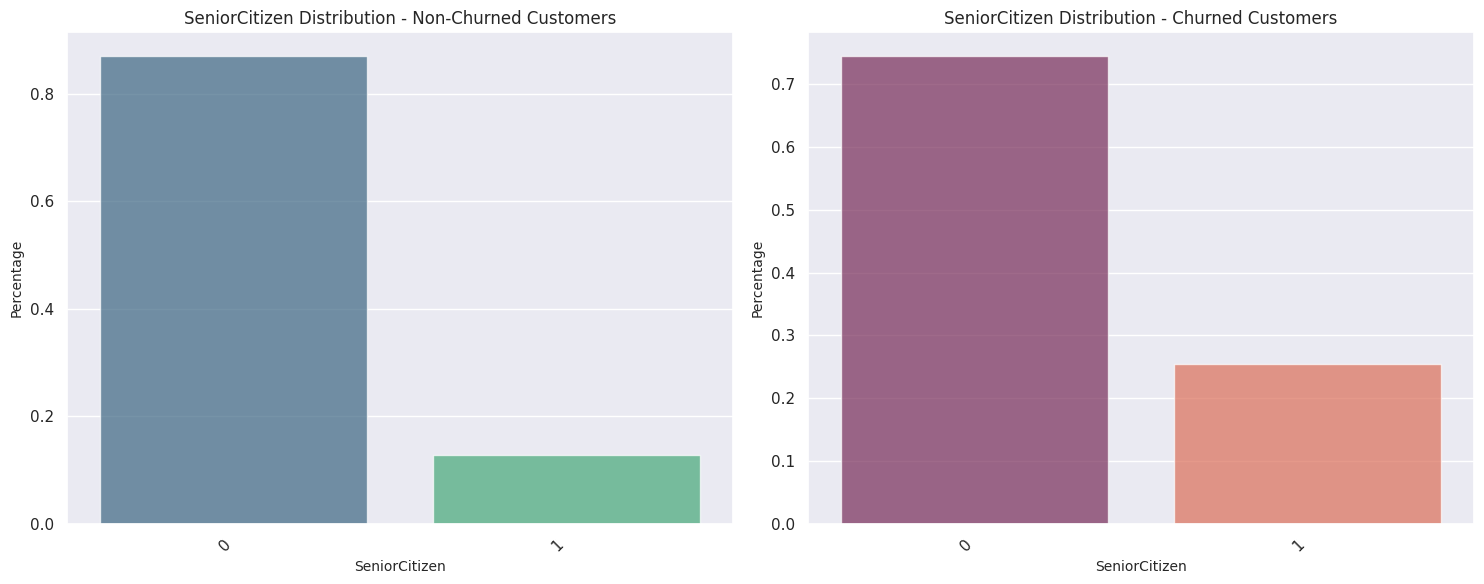

In [85]:
categorical_var_churn_dist('SeniorCitizen')


### Distribution Breakdown

#### Non-Churned Customers (Churn = 0):
- Non-Senior Citizens: 87.13%
- Senior Citizens: 12.87%

#### Churned Customers (Churn = 1):
- Non-Senior Citizens: 74.53%
- Senior Citizens: 25.47%

### Churn Rates

#### By Senior Citizen Status:
- Senior Citizens: 41.68% churn rate
- Non-Senior Citizens: 23.61% churn rate

### Key Insights

1. **Disproportionate Churn Risk**
   - Senior citizens have a significantly higher churn rate
   - Almost 1.8 times more likely to churn compared to non-senior citizens

2. **Representation Shift**
   - While senior citizens represent only 12.87% of non-churned customers
   - They constitute 25.47% of churned customers

### Potential Factors
- Service complexity
- Pricing structures
- Communication challenges
- Less digital-native demographic
- Specific service needs


Partner Churn Distribution Summary:
   Churn  Partner  Percentage
0      0        1    0.528218
1      0        0    0.471782
2      1        0    0.642055
3      1        1    0.357945

Churn Rates by Partner
Partner
0    0.329580
1    0.196649
Name: Churn, dtype: float64


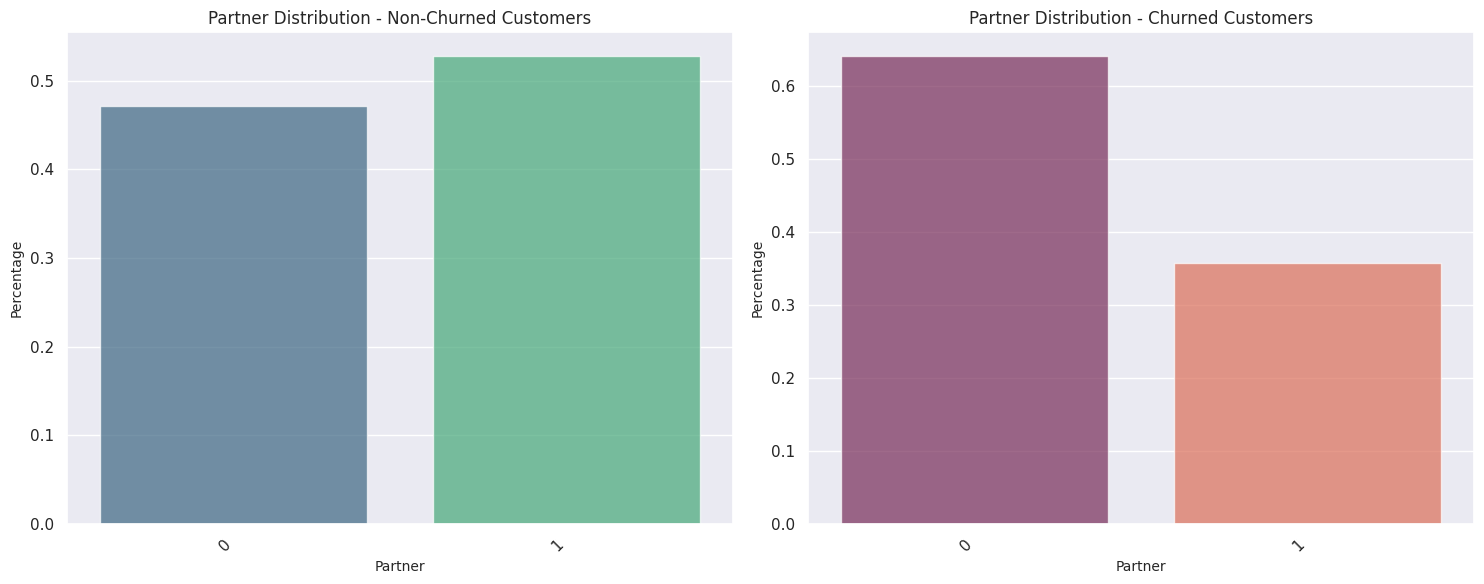

In [86]:
categorical_var_churn_dist('Partner')

Let's break down the Partner Churn Analysis:

### Distribution Breakdown

#### Non-Churned Customers (Churn = 0):
- Customers with Partner: 52.82%
- Customers without Partner: 47.18%

#### Churned Customers (Churn = 1):
- Customers without Partner: 64.21%
- Customers with Partner: 35.79%

### Churn Rates

#### By Partner Status:
- Customers without Partner: 32.96% churn rate
- Customers with Partner: 19.66% churn rate

### Key Insights

1. **Significant Churn Disparity**
   - Customers without a partner are nearly 1.7 times more likely to churn
   - Having a partner appears to be a stabilizing factor in service retention

2. **Representation Shift**
   - Customers without partners dominate the churned customer group
   - Substantial increase in churn rate for those without partners

### Potential Contributing Factors
- Financial stability
- Shared decision-making
- Reduced individual financial burden
- Potentially more stable lifestyle
- Shared communication needs


Dependents Churn Distribution Summary:
   Churn  Dependents  Percentage
0      0           0    0.655199
1      0           1    0.344801
2      1           0    0.825575
3      1           1    0.174425

Churn Rates by Dependents
Dependents
0    0.312791
1    0.154502
Name: Churn, dtype: float64


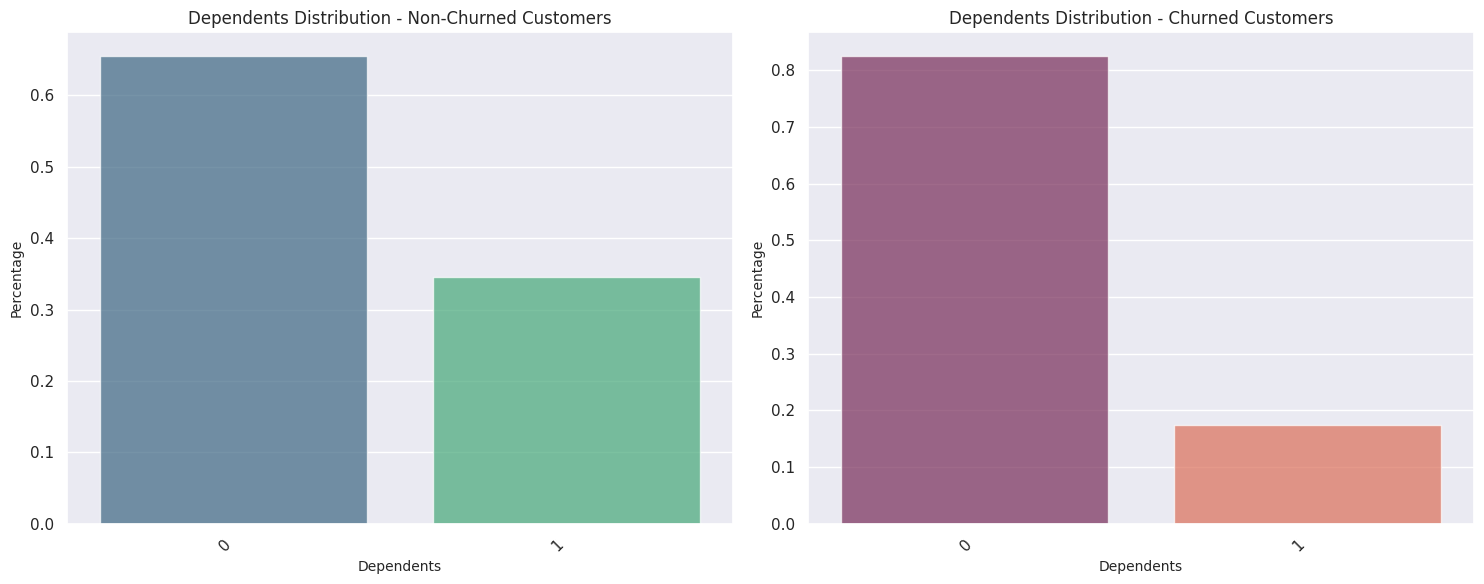

In [87]:
categorical_var_churn_dist('Dependents')


### Distribution Breakdown

#### Non-Churned Customers (Churn = 0):
- Customers without Dependents: 65.52%
- Customers with Dependents: 34.48%

#### Churned Customers (Churn = 1):
- Customers without Dependents: 82.56%
- Customers with Dependents: 17.44%

### Churn Rates

#### By Dependents Status:
- Customers without Dependents: 31.28% churn rate
- Customers with Dependents: 15.45% churn rate

### Key Insights

1. **Dramatic Churn Difference**
   - Customers without dependents are approximately 2 times more likely to churn
   - Having dependents appears to be a strong predictor of service retention

2. **Representation Shift**
   - Customers without dependents are overrepresented in the churned group
   - Significant reduction in churn for customers with dependents

### Potential Contributing Factors
- Increased financial stability
- Long-term service commitment
- Family-oriented decision-making
- More consistent communication needs
- Reduced likelihood of impulsive service changes



PhoneService Churn Distribution Summary:
   Churn  PhoneService  Percentage
0      0             1    0.901044
1      0             0    0.098956
2      1             1    0.909042
3      1             0    0.090958

Churn Rates by PhoneService
PhoneService
1    0.267096
0    0.249267
Name: Churn, dtype: float64


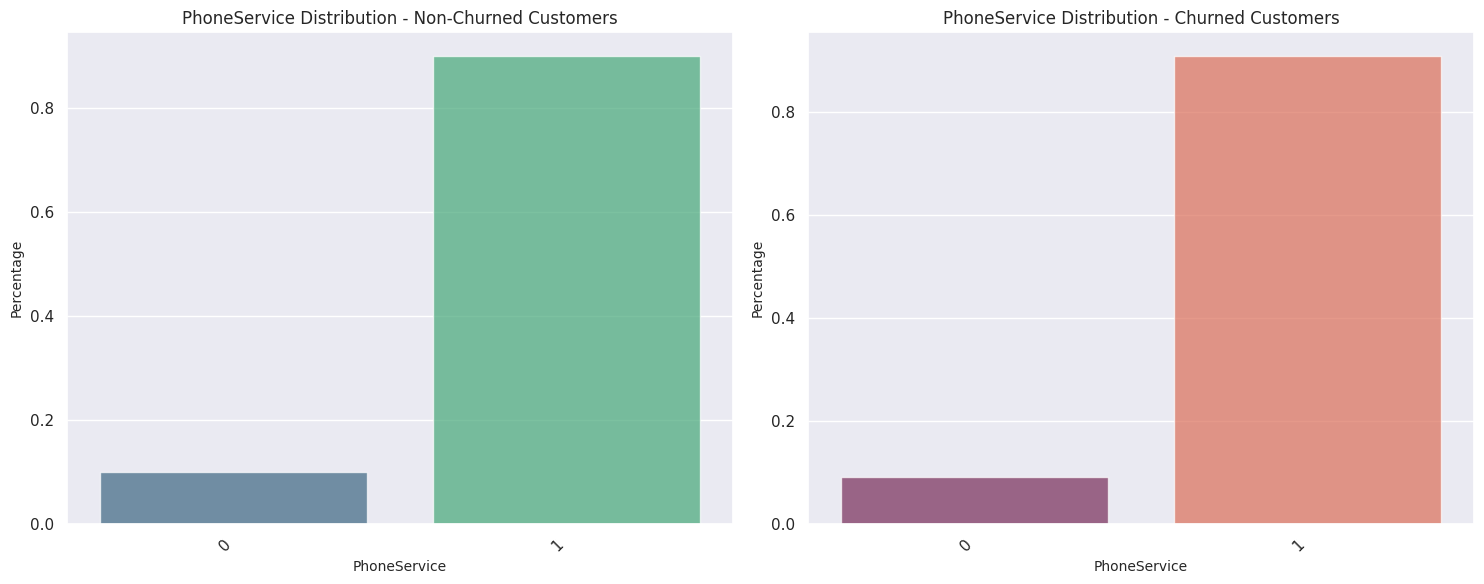

In [88]:
categorical_var_churn_dist('PhoneService')


### Distribution Breakdown

#### Non-Churned Customers (Churn = 0):
- Customers with Phone Service: 90.10%
- Customers without Phone Service: 9.90%

#### Churned Customers (Churn = 1):
- Customers with Phone Service: 90.90%
- Customers without Phone Service: 9.10%

### Churn Rates

#### By Phone Service Status:
- Customers with Phone Service: 26.71% churn rate
- Customers without Phone Service: 24.93% churn rate

### Key Insights

1. **Minimal Churn Difference**
   - Nearly identical distribution of phone service users in churned and non-churned groups
   - Slight difference in churn rates (less than 2%)

2. **Service Ubiquity**
   - Overwhelming majority of customers have phone service
   - Phone service alone does not appear to be a critical churn predictor

### Potential Observations
- Phone service is almost a standard offering
- Other factors likely more important in customer retention
- Quality of service may matter more than its mere presence


InternetService Churn Distribution Summary:
   Churn  InternetService  Percentage
0      0                1    0.726904
1      0                0    0.273096
2      1                1    0.939540
3      1                0    0.060460

Churn Rates by InternetService
InternetService
1    0.318289
0    0.074050
Name: Churn, dtype: float64


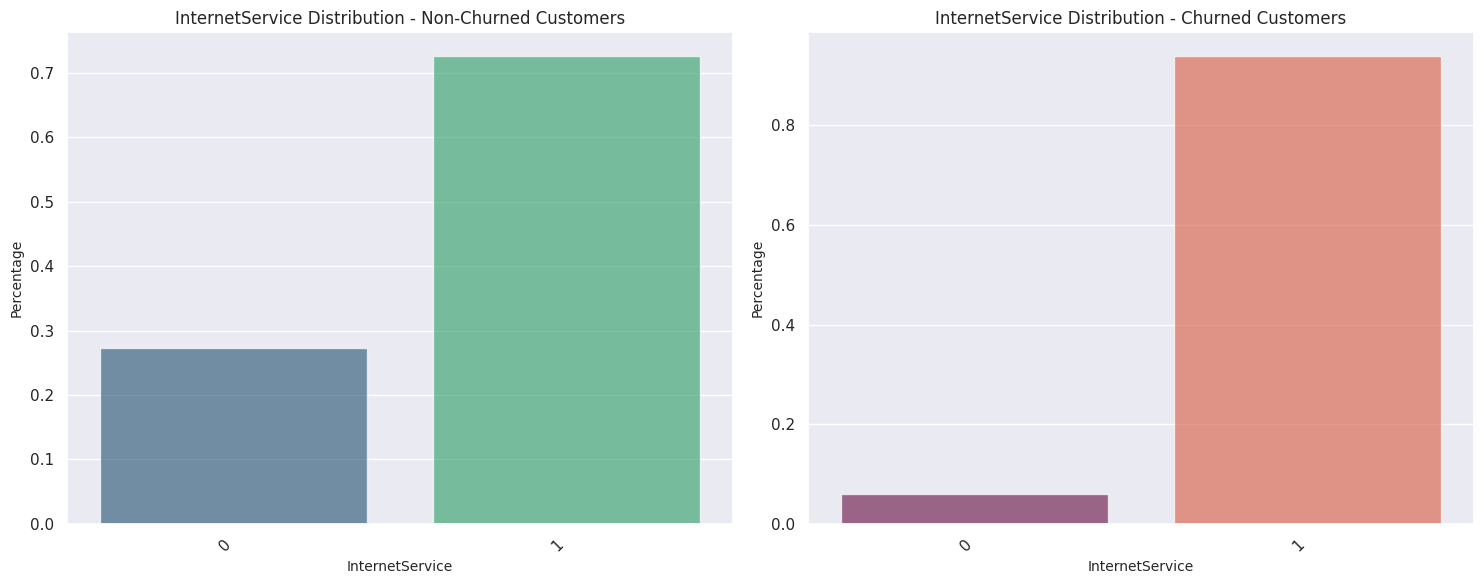

In [89]:
categorical_var_churn_dist('InternetService')

### Distribution Breakdown

#### Non-Churned Customers (Churn = 0):
- Customers with Internet Service: 72.69%
- Customers without Internet Service: 27.31%

#### Churned Customers (Churn = 1):
- Customers with Internet Service: 93.95%
- Customers without Internet Service: 6.05%

### Churn Rates

#### By Internet Service Status:
- Customers with Internet Service: 31.83% churn rate
- Customers without Internet Service: 7.41% churn rate

### Key Insights

1. **Significant Churn Disparity**
   - Customers with internet service have a dramatically higher churn rate
   - Nearly 4.3 times more likely to churn compared to those without internet service

2. **Service Dominance**
   - Overwhelming majority of churned customers have internet service
   - Internet service is almost ubiquitous among customers

### Potential Factors
- Competitive internet service market
- Pricing variations
- Service quality differences
- Emerging alternative connectivity options
- Rapidly changing technology landscape


StreamingTV Churn Distribution Summary (Filtered by InternetService):
   Churn  StreamingTV  Percentage
0      0            1    0.503324
1      0            0    0.496676
2      1            0    0.536446
3      1            1    0.463554

Churn Rates by StreamingTV
StreamingTV
1    0.300702
0    0.243312
Name: Churn, dtype: float64


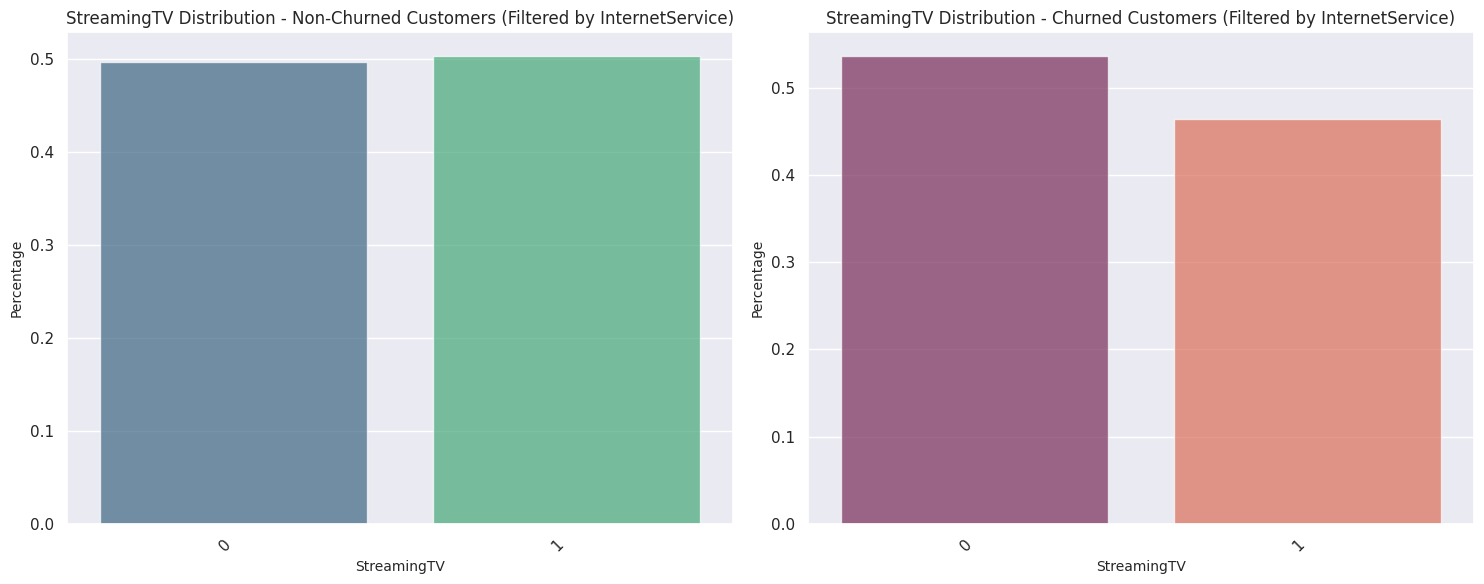

In [90]:
categorical_var_churn_dist('StreamingTV','InternetService')

### Distribution Breakdown

#### Non-Churned Customers (Churn = 0):
- Customers with Streaming TV: 50.33%
- Customers without Streaming TV: 49.67%

#### Churned Customers (Churn = 1):
- Customers without Streaming TV: 53.64%
- Customers with Streaming TV: 46.36%

### Churn Rates

#### By Streaming TV Status:
- Customers with Streaming TV: 30.07% churn rate
- Customers without Streaming TV: 24.33% churn rate

### Key Insights

1. **Moderate Churn Difference**
   - Customers with Streaming TV have a slightly higher churn rate
   - Approximately 1.24 times more likely to churn

2. **Distribution Nuances**
   - Near-even split between customers with and without Streaming TV in non-churned group
   - Slight preference for non-Streaming TV customers in churned group

### Potential Factors
- Service quality of Streaming TV
- Additional cost considerations
- Variety of streaming options
- User experience of the service
- Changing entertainment consumption patterns


StreamingMovies Churn Distribution Summary:
   Churn  StreamingMovies  Percentage
0      0                0    0.630073
1      0                1    0.369927
2      1                0    0.562333
3      1                1    0.437667

Churn Rates by StreamingMovies
StreamingMovies
1    0.299414
0    0.243795
Name: Churn, dtype: float64


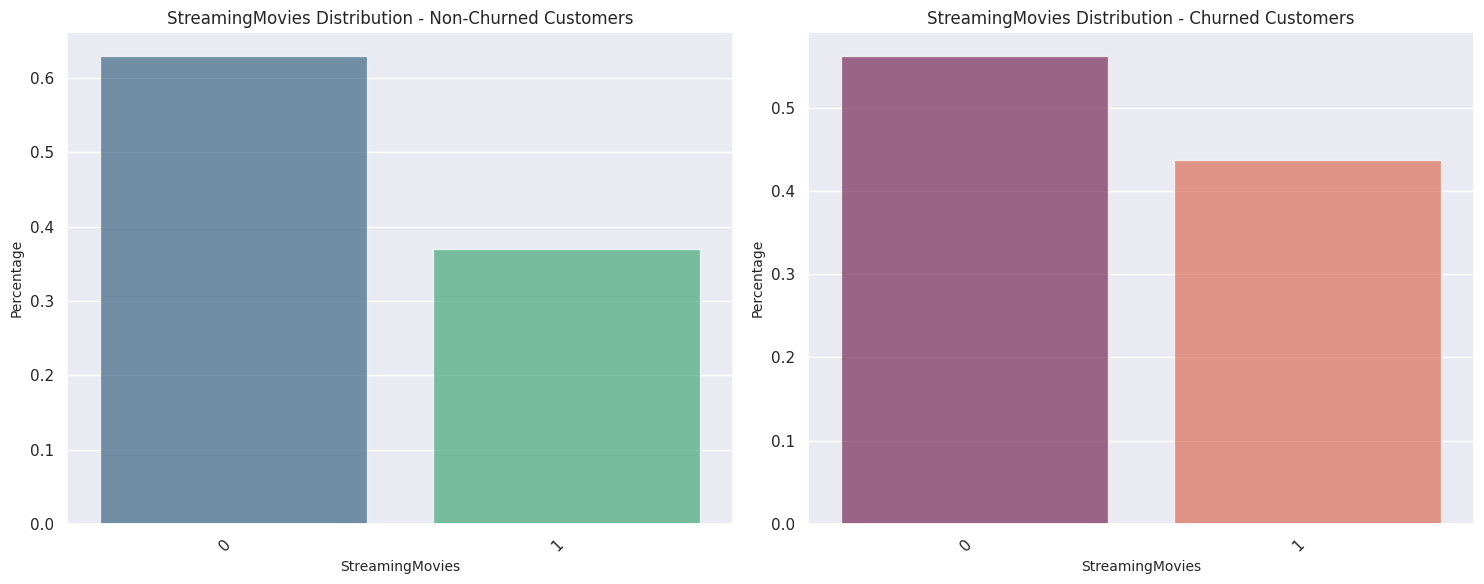

In [91]:
categorical_var_churn_dist('StreamingMovies')

### Distribution Breakdown

#### Non-Churned Customers (Churn = 0):
- Customers without Streaming Movies: 63.01%
- Customers with Streaming Movies: 36.99%

#### Churned Customers (Churn = 1):
- Customers without Streaming Movies: 56.23%
- Customers with Streaming Movies: 43.77%

### Churn Rates

#### By Streaming Movies Status:
- Customers with Streaming Movies: 29.94% churn rate
- Customers without Streaming Movies: 24.38% churn rate

### Key Insights

1. **Moderate Churn Difference**
   - Customers with Streaming Movies have a slightly higher churn rate
   - Approximately 1.23 times more likely to churn

2. **Distribution Patterns**
   - More customers without Streaming Movies in both churned and non-churned groups
   - Relatively balanced representation of Streaming Movies users

### Potential Contributing Factors
- Perceived value of Streaming Movies service
- Additional cost considerations
- Content variety and quality
- Competition from alternative entertainment options
- Integration with existing service packages



OnlineSecurity Churn Distribution Summary (Filtered by InternetService):
   Churn  OnlineSecurity  Percentage
0      0               0    0.541611
1      0               1    0.458389
2      1               0    0.832005
3      1               1    0.167995

Churn Rates by OnlineSecurity
OnlineSecurity
0    0.313296
1    0.146112
Name: Churn, dtype: float64


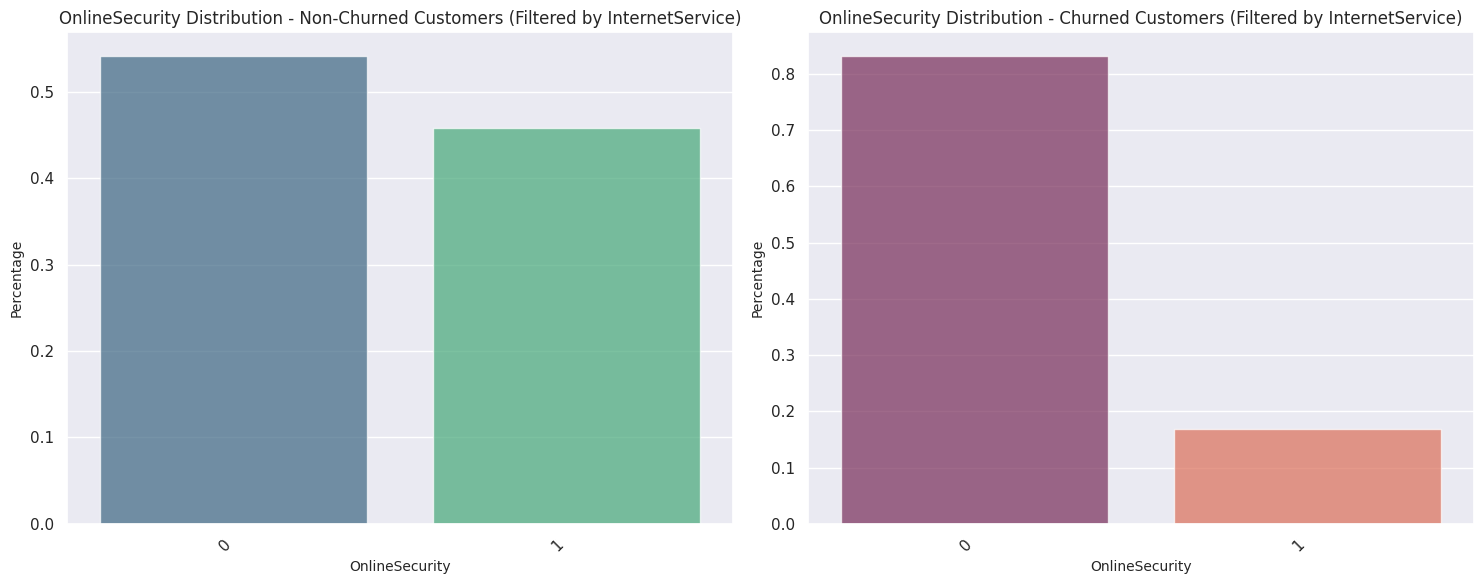

In [92]:
categorical_var_churn_dist('OnlineSecurity','InternetService')

### Distribution Breakdown

#### Non-Churned Customers (Churn = 0):
- Customers without Online Security: 54.16%
- Customers with Online Security: 45.84%

#### Churned Customers (Churn = 1):
- Customers without Online Security: 83.20%
- Customers with Online Security: 16.80%

### Churn Rates

#### By Online Security Status:
- Customers without Online Security: 31.33% churn rate
- Customers with Online Security: 14.61% churn rate

### Key Insights

1. **Dramatic Churn Difference**
   - Customers without Online Security are more than 2 times more likely to churn
   - Stark contrast in churn rates between secured and unsecured customers

2. **Representation Shift**
   - Customers without Online Security dominate the churned customer group
   - Significant reduction in churn for customers with Online Security

### Potential Contributing Factors
- Perceived value of security services
- Risk awareness
- Customer trust in service provider
- Understanding of online threats
- Willingness to invest in additional protection


OnlineBackup Churn Distribution Summary (Filtered by InternetService):
   Churn  OnlineBackup  Percentage
0      0             1    0.506780
1      0             0    0.493220
2      1             0    0.702164
3      1             1    0.297836

Churn Rates by OnlineBackup
OnlineBackup
0    0.291721
1    0.215315
Name: Churn, dtype: float64


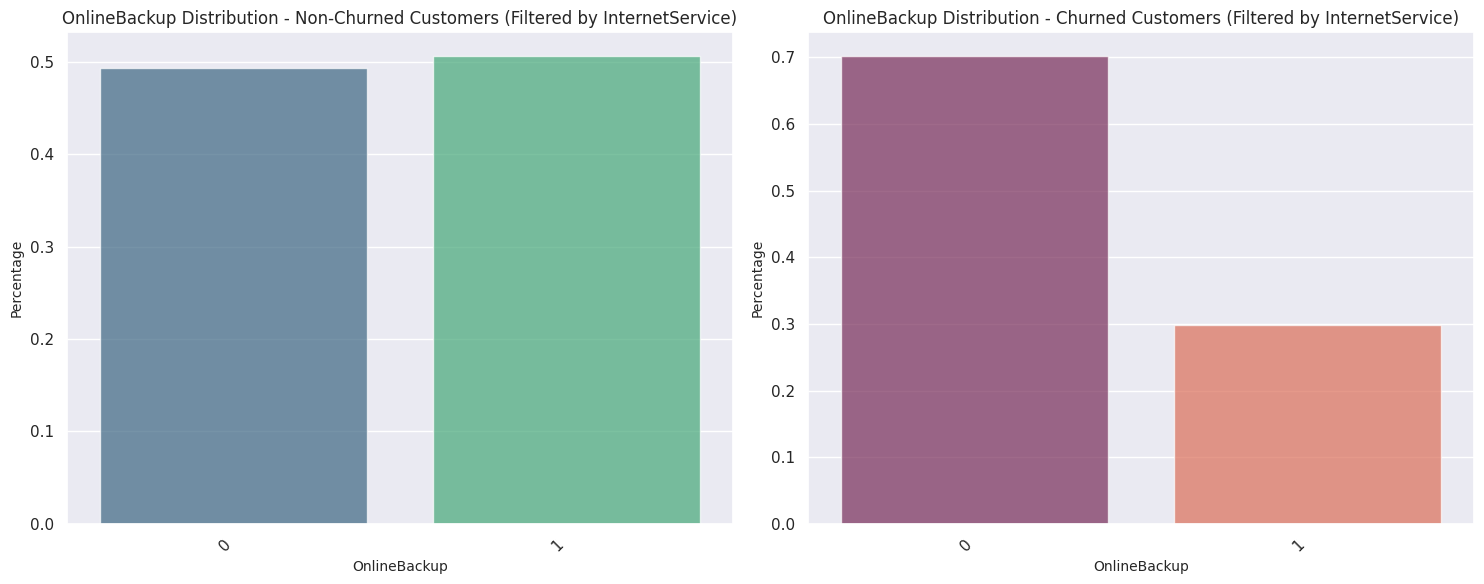

In [93]:
categorical_var_churn_dist('OnlineBackup','InternetService')

### Distribution Breakdown

#### Non-Churned Customers (Churn = 0):
- Customers with Online Backup: 50.68%
- Customers without Online Backup: 49.32%

#### Churned Customers (Churn = 1):
- Customers without Online Backup: 70.22%
- Customers with Online Backup: 29.78%

### Churn Rates

#### By Online Backup Status:
- Customers without Online Backup: 29.17% churn rate
- Customers with Online Backup: 21.53% churn rate

### Key Insights

1. **Significant Churn Difference**
   - Customers without Online Backup are approximately 1.35 times more likely to churn
   - Clear correlation between having Online Backup and reduced churn

2. **Distribution Patterns**
   - Near-even split of customers with and without backup in non-churned group
   - Pronounced preference for backup-less customers in churned group

### Potential Contributing Factors
- Data protection awareness
- Perceived value of backup services
- Fear of data loss
- Understanding of digital risk
- Cost considerations of backup services


DeviceProtection Churn Distribution Summary (Filtered by InternetService):
   Churn  DeviceProtection  Percentage
0      0                 0    0.500931
1      0                 1    0.499069
2      1                 0    0.689636
3      1                 1    0.310364

Churn Rates by DeviceProtection
DeviceProtection
0    0.286518
1    0.225021
Name: Churn, dtype: float64


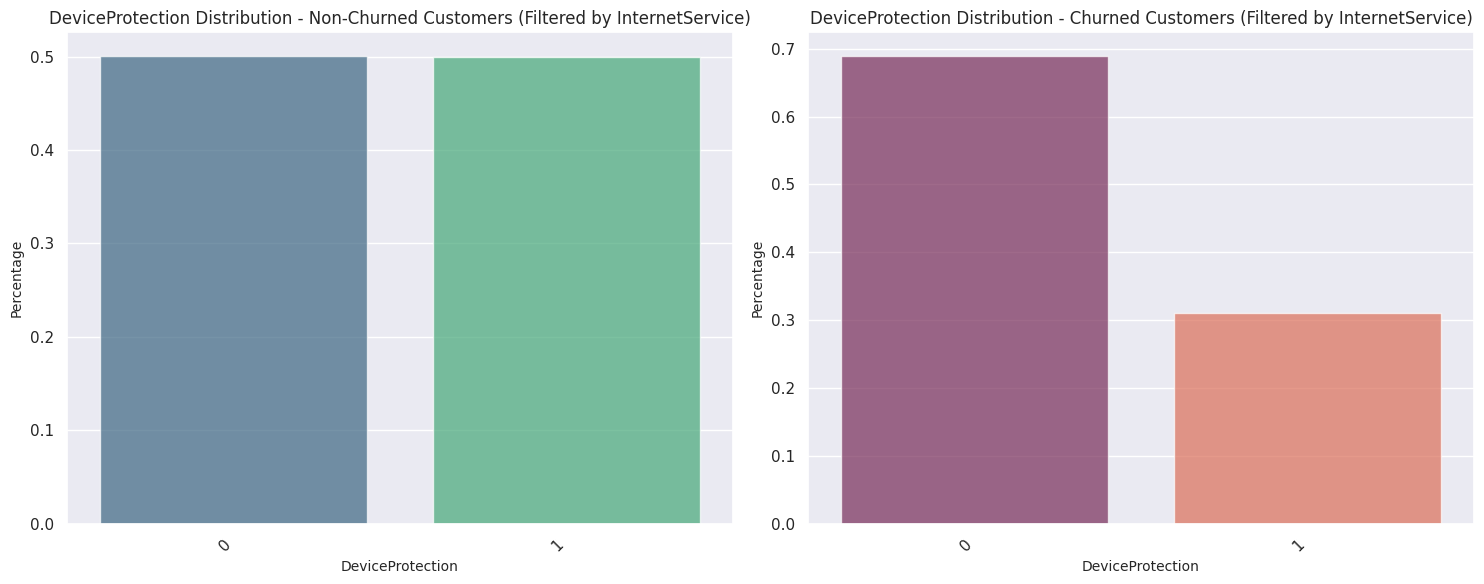

In [94]:
categorical_var_churn_dist('DeviceProtection','InternetService')

### Distribution Breakdown

#### Non-Churned Customers (Churn = 0):
- Customers without Device Protection: 50.09%
- Customers with Device Protection: 49.91%

#### Churned Customers (Churn = 1):
- Customers without Device Protection: 68.96%
- Customers with Device Protection: 31.04%

### Churn Rates

#### By Device Protection Status:
- Customers without Device Protection: 28.65% churn rate
- Customers with Device Protection: 22.50% churn rate

### Key Insights

1. **Notable Churn Difference**
   - Customers without Device Protection are approximately 1.27 times more likely to churn
   - Clear indication that Device Protection contributes to customer retention

2. **Distribution Patterns**
   - Almost even split of customers with and without protection in non-churned group
   - Significant preference for unprotected customers in churned group

### Potential Contributing Factors
- Risk awareness
- Financial protection perception
- Cost of device replacement
- Understanding of potential device-related risks
- Value proposition of protection services


TechSupport Churn Distribution Summary (Filtered by InternetService):
   Churn  TechSupport  Percentage
0      0            0    0.538952
1      0            1    0.461048
2      1            0    0.823462
3      1            1    0.176538

Churn Rates by TechSupport
TechSupport
0    0.311862
1    0.151663
Name: Churn, dtype: float64


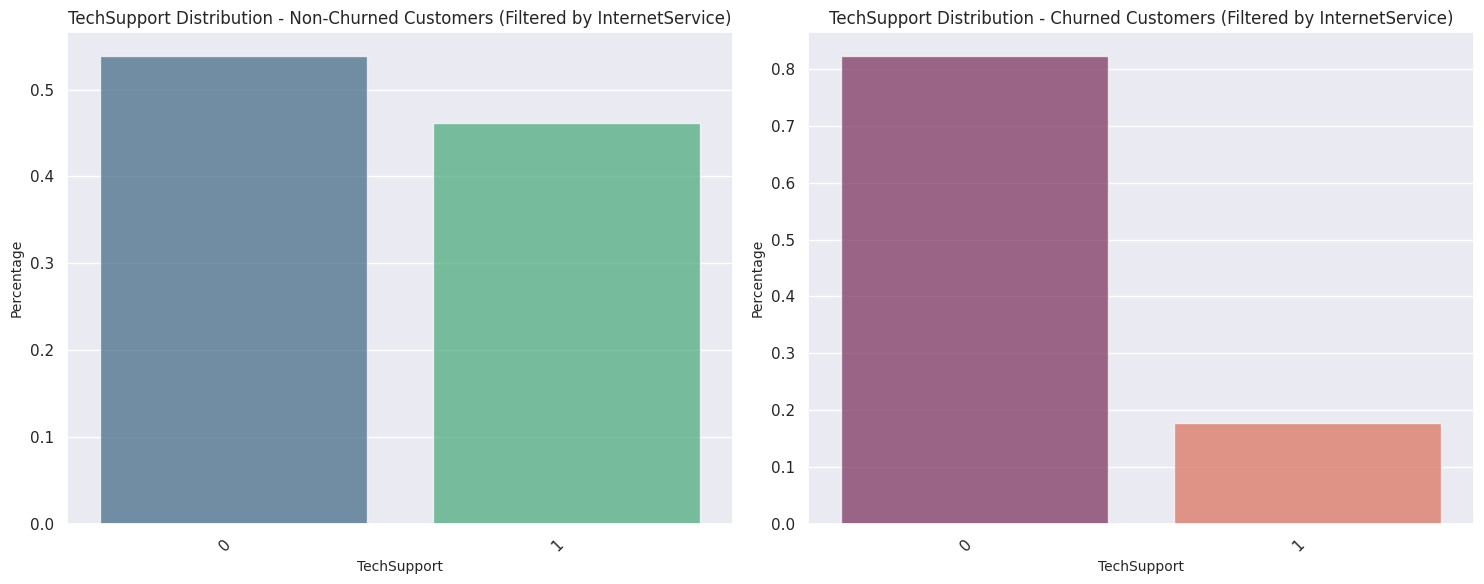

In [95]:
categorical_var_churn_dist('TechSupport','InternetService')

### Distribution Breakdown

#### Non-Churned Customers (Churn = 0):
- Customers without Tech Support: 53.90%
- Customers with Tech Support: 46.10%

#### Churned Customers (Churn = 1):
- Customers without Tech Support: 82.35%
- Customers with Tech Support: 17.65%

### Churn Rates

#### By Tech Support Status:
- Customers without Tech Support: 31.19% churn rate
- Customers with Tech Support: 15.17% churn rate

### Key Insights

1. **Dramatic Churn Difference**
   - Customers without Tech Support are more than 2 times more likely to churn
   - Most pronounced difference in churn rates among service add-ons

2. **Representation Shift**
   - Customers without Tech Support overwhelmingly dominate the churned customer group
   - Significant reduction in churn for customers with Tech Support

### Potential Contributing Factors
- Customer service accessibility
- Problem resolution efficiency
- Feeling of technical security
- Complexity of service
- Confidence in support infrastructure


PaperlessBilling Churn Distribution Summary:
   Churn  PaperlessBilling  Percentage
0      0                 1    0.535562
1      0                 0    0.464438
2      1                 1    0.749064
3      1                 0    0.250936

Churn Rates by PaperlessBilling
PaperlessBilling
1    0.335651
0    0.163301
Name: Churn, dtype: float64


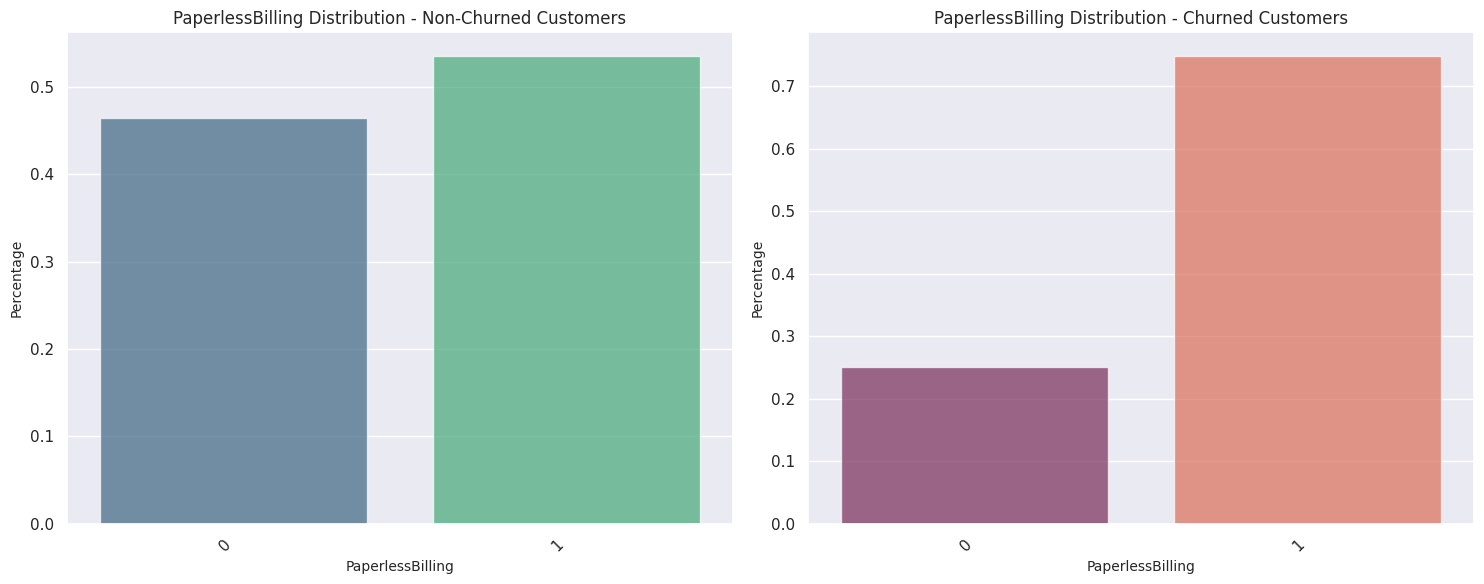

In [96]:
categorical_var_churn_dist('PaperlessBilling')

### Distribution Breakdown

#### Non-Churned Customers (Churn = 0):
- Customers with Paperless Billing: 53.56%
- Customers without Paperless Billing: 46.44%

#### Churned Customers (Churn = 1):
- Customers with Paperless Billing: 74.91%
- Customers without Paperless Billing: 25.09%

### Churn Rates

#### By Paperless Billing Status:
- Customers with Paperless Billing: 33.57% churn rate
- Customers without Paperless Billing: 16.33% churn rate

### Key Insights

1. **Significant Churn Difference**
   - Customers with Paperless Billing are more than 2 times more likely to churn
   - Dramatic shift in distribution between churned and non-churned groups

2. **Representation Patterns**
   - Paperless Billing dominates the churned customer group
   - Suggests potential underlying factors beyond billing method

### Potential Contributing Factors
- Digital-first customer segment
- Higher technical engagement
- Potentially more price-sensitive customers
- Easier service switching for digitally comfortable users
- Correlation with younger, more mobile customer base


<b>Churn subscriber likely to have fiber optic(73%) internet service rather than DSL service</b>

ContractType Churn Distribution Summary:
   Churn    ContractType  Percentage
0      0  Month-to-month    0.429068
1      0        Two year    0.318322
2      0        One year    0.252609
3      1  Month-to-month    0.885500
4      1        One year    0.088818
5      1        Two year    0.025682

Churn Rates by ContractType
ContractType
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


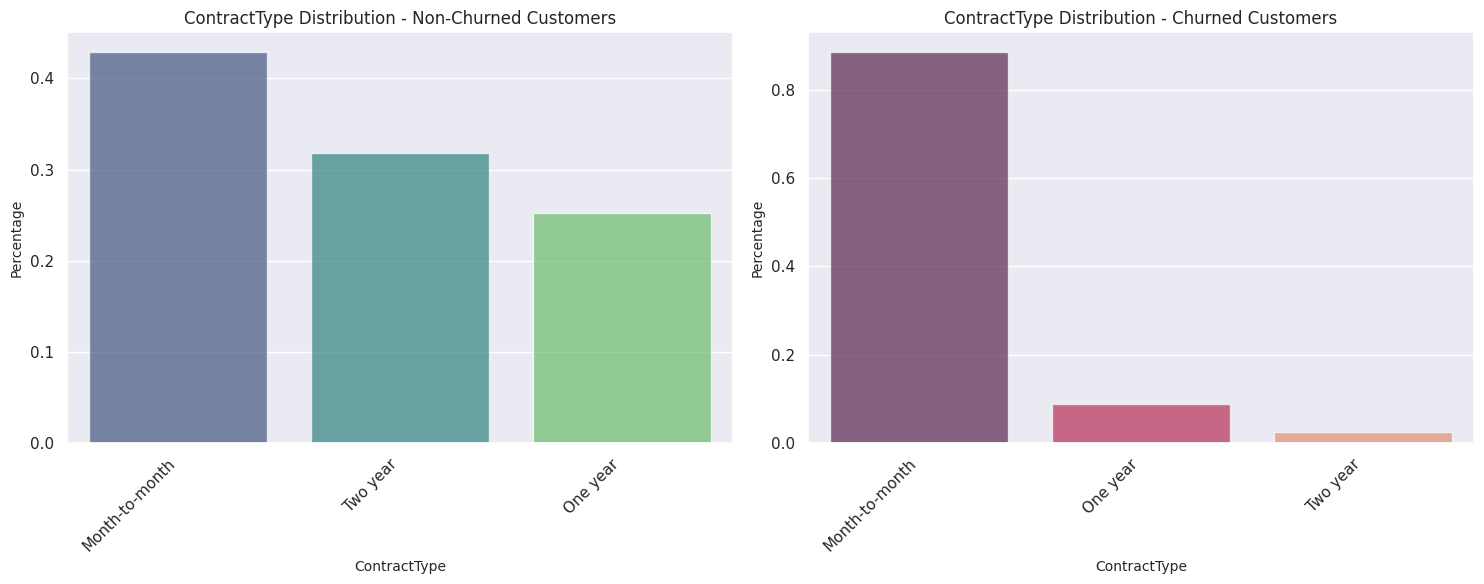

In [97]:
categorical_var_churn_dist('ContractType')

### Distribution Breakdown

#### Non-Churned Customers (Churn = 0):
- Month-to-month Contracts: 42.91%
- Two-year Contracts: 31.83%
- One-year Contracts: 25.26%

#### Churned Customers (Churn = 1):
- Month-to-month Contracts: 88.55%
- One-year Contracts: 8.88%
- Two-year Contracts: 2.57%

### Churn Rates

#### By Contract Type:
- Month-to-month Contracts: 42.71% churn rate
- One-year Contracts: 11.27% churn rate
- Two-year Contracts: 2.83% churn rate

### Key Insights

1. **Dramatic Churn Variation**
   - Month-to-month contracts have an exponentially higher churn rate
   - Churn rate decreases dramatically with longer contract commitments
   - Two-year contracts show the most customer stability

2. **Contract Commitment Impact**
   - Longer contract durations strongly correlate with customer retention
   - Flexibility of month-to-month contracts comes at the cost of higher churn

### Potential Contributing Factors
- Financial commitment
- Perceived service value
- Switching costs
- Customer satisfaction
- Price sensitivity
- Contractual lock-in benefits


PaymentMethod Churn Distribution Summary:
   Churn              PaymentMethod  Percentage
0      0               Mailed check    0.252029
1      0           Electronic check    0.250097
2      0    Credit card (automatic)    0.249324
3      0  Bank transfer (automatic)    0.248550
4      1           Electronic check    0.573034
5      1               Mailed check    0.164794
6      1  Bank transfer (automatic)    0.138042
7      1    Credit card (automatic)    0.124131

Churn Rates by PaymentMethod
PaymentMethod
Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: Churn, dtype: float64


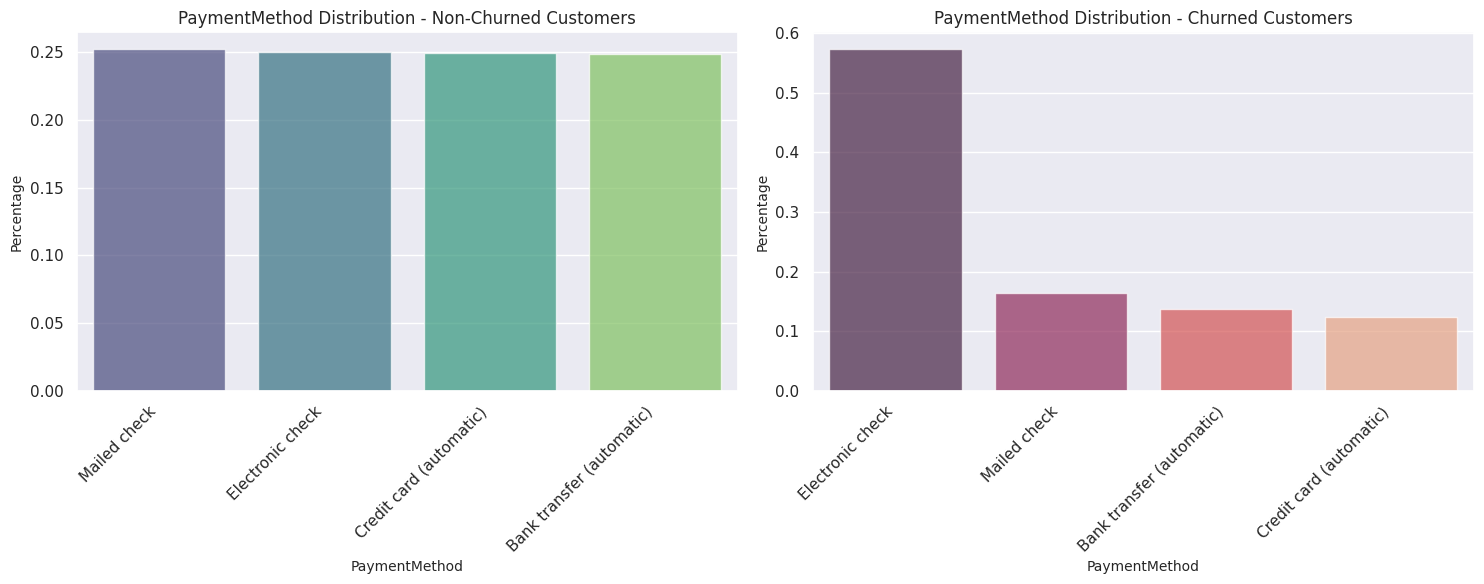

In [98]:
categorical_var_churn_dist('PaymentMethod')

### Distribution Breakdown

#### Non-Churned Customers (Churn = 0):
- Mailed check: 25.20%
- Electronic check: 25.01%
- Credit card (automatic): 24.93%
- Bank transfer (automatic): 24.86%

#### Churned Customers (Churn = 1):
- Electronic check: 57.30%
- Mailed check: 16.48%
- Bank transfer (automatic): 13.80%
- Credit card (automatic): 12.41%

### Churn Rates

#### By Payment Method:
- Electronic check: 45.29% churn rate
- Mailed check: 19.11% churn rate
- Bank transfer (automatic): 16.71% churn rate
- Credit card (automatic): 15.24% churn rate

### Key Insights

1. **Stark Payment Method Differences**
   - Electronic check shows dramatically higher churn rate
   - Automatic payment methods (bank transfer, credit card) demonstrate lowest churn

2. **Payment Method Correlation**
   - Automatic payment methods associated with higher customer retention
   - Manual payment methods (especially electronic check) linked to higher churn risk

### Potential Contributing Factors
- Payment convenience
- Financial stability
- Commitment level
- Ease of cancellation
- Customer engagement
- Financial management preferences


# ---------------------------------------------------------------------------------------------------------------------------------------

# Comprehensive Churn Analysis: Feature Contributions

## 1. Demographic Factors

### Gender
- Minimal impact on churn
- Churn Rates:
  - Female: 26.92%
  - Male: 26.16%
- Insight: Gender is not a significant predictor of customer churn

### Senior Citizen Status
- Significant churn influence
- Churn Rates:
  - Senior Citizens: 41.68%
  - Non-Senior Citizens: 23.61%
- Reasons:
  - Potential technology challenges
  - Less adaptable to digital services
  - Higher price sensitivity
  - Unique service needs

### Partner Status
- Moderate churn impact
- Churn Rates:
  - Without Partner: 32.96%
  - With Partner: 19.66%
- Reasons:
  - Shared decision-making
  - Financial stability
  - Longer-term perspective
  - Collective service commitment

### Dependents
- Strong churn influence
- Churn Rates:
  - Without Dependents: 31.28%
  - With Dependents: 15.45%
- Reasons:
  - Family-oriented stability
  - Long-term financial planning
  - Reduced service switching

## 2. Service Characteristics

### Phone Service
- Minimal churn impact
- Churn Rates:
  - With Phone Service: 26.71%
  - Without Phone Service: 24.93%
- Insight: Ubiquitous service, not a differentiator

### Internet Service
- High churn impact
- Churn Rates:
  - With Internet Service: 31.83%
  - Without Internet Service: 7.41%
- Reasons:
  - Competitive market
  - Rapidly changing technology
  - Multiple service options
  - Price sensitivity

### Streaming Services
#### Streaming TV
- Moderate churn impact
- Churn Rates:
  - With Streaming TV: 30.07%
  - Without Streaming TV: 24.33%
- Reasons:
  - Evolving entertainment preferences
  - Content variety
  - Additional cost considerations

#### Streaming Movies
- Similar to Streaming TV
- Churn Rates:
  - With Streaming Movies: 29.94%
  - Without Streaming Movies: 24.38%
- Reasons:
  - Content quality
  - Entertainment options
  - Perceived value

### Additional Services

#### Online Security
- Significant churn impact
- Churn Rates:
  - Without Online Security: 31.33%
  - With Online Security: 14.61%
- Reasons:
  - Risk awareness
  - Trust in service provider
  - Perceived protection value

#### Online Backup
- Moderate churn impact
- Churn Rates:
  - Without Online Backup: 29.17%
  - With Online Backup: 21.53%
- Reasons:
  - Data protection awareness
  - Fear of data loss
  - Digital risk understanding

#### Device Protection
- Moderate churn impact
- Churn Rates:
  - Without Device Protection: 28.65%
  - With Device Protection: 22.50%
- Reasons:
  - Financial risk mitigation
  - Device replacement cost
  - Protection perception

#### Tech Support
- High churn impact
- Churn Rates:
  - Without Tech Support: 31.19%
  - With Tech Support: 15.17%
- Reasons:
  - Service accessibility
  - Problem resolution efficiency
  - Technical confidence

## 3. Account Characteristics

### Paperless Billing
- Significant churn impact
- Churn Rates:
  - With Paperless Billing: 33.57%
  - Without Paperless Billing: 16.33%
- Reasons:
  - Digital-first customer segment
  - More price-sensitive
  - Easier service switching

### Contract Type
- Extremely high churn impact
- Churn Rates:
  - Month-to-month: 42.71%
  - One-year: 11.27%
  - Two-year: 2.83%
- Reasons:
  - Commitment level
  - Switching barriers
  - Long-term value perception

### Payment Method
- Significant churn impact
- Churn Rates:
  - Electronic check: 45.29%
  - Mailed check: 19.11%
  - Bank transfer: 16.71%
  - Credit card (auto): 15.24%
- Reasons:
  - Payment convenience
  - Financial stability
  - Commitment level

## Key Takeaways
1. Contract type and payment method are the strongest churn predictors
2. Additional services significantly impact retention
3. Demographic factors play a moderate role
4. Focus on long-term commitment and service value



#### Distribution of Tenure, Monthly Charges

Right now, in our dataset, we have continuos variables are Tenure, MonthlyCharges and TotalCharges. so let's deep dive into this variables.

- Tenure Distribution shows that customers who has tenure around less than a year left the brand more
- Monthly Charges Distribution shows that customers who has around more than $65 left brands more

In [104]:
def numerical_distribution(feature):
    """
    Create a comprehensive visualization of numerical feature distribution
    with separate plots for overall distribution and churn comparison.
    
    Parameters:
    -----------
    feature : str
        Numerical column to analyze
    """
    # Create figure with more space and better layout
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    fig.suptitle(f'{feature} Distribution Analysis', fontweight='bold')
    
    # Overall Distribution
    sns.kdeplot(
        x=df_cal[feature],
        fill=True,
        color='green',
        alpha=0.5,
        linewidth=2,
        ax=ax1
    )
    ax1.set_title(f'Overall {feature} Distribution')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Density')
    
    # Churn Comparison Distribution
    # Churned Customers
    churned = df_cal[df_cal['Churn'] == 1][feature]
    non_churned = df_cal[df_cal['Churn'] == 0][feature]
    
    sns.kdeplot(
        x=churned, 
        label='Churned Customers',
        color='red',
        fill=True,
        alpha=0.5,
        linewidth=2,
        ax=ax2
    )
    
    # Non-Churned Customers
    sns.kdeplot(
        x=non_churned, 
        label='Non-Churned Customers',
        color='blue',
        fill=True,
        alpha=0.5,
        linewidth=2,
        ax=ax2
    )
    
    ax2.set_title(f'{feature} Distribution: Churn Comparison')
    ax2.set_xlabel(feature)
    ax2.set_ylabel('Density')
    ax2.legend()
    
    plt.tight_layout()
    
    # Print statistical summary
    print(f"\nStatistical Summary for {feature}:")
    print("\nOverall Statistics:")
    print(df_cal[feature].describe())
    
    print("\nChurned Customers Statistics:")
    print(churned.describe())
    
    print("\nNon-Churned Customers Statistics:")
    print(non_churned.describe())
    
    plt.show()



Statistical Summary for Tenure:

Overall Statistics:
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64

Churned Customers Statistics:
count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: Tenure, dtype: float64

Non-Churned Customers Statistics:
count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: Tenure, dtype: float64


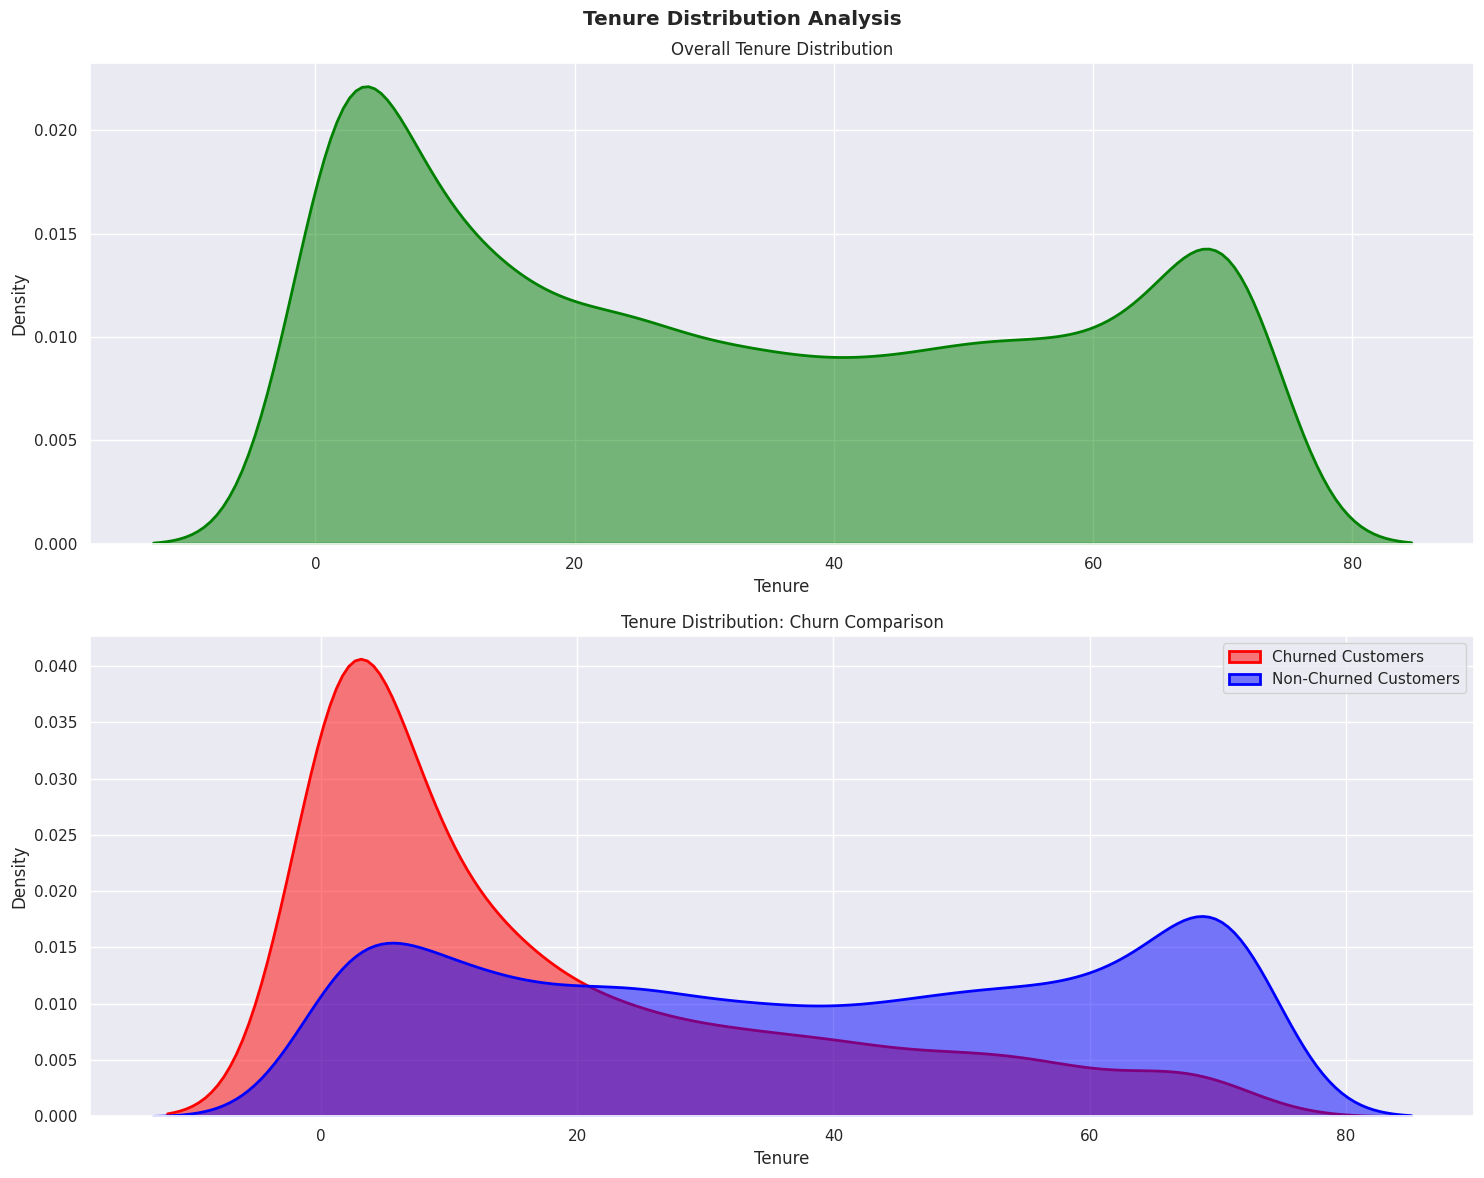

In [105]:
numerical_distribution('Tenure')

### Overall Tenure Statistics

#### Mean Tenure
- Overall: 32.37 months
- Churned Customers: 17.98 months
- Non-Churned Customers: 37.57 months

#### Key Insights

1. **Tenure Distribution**
   - Significant difference in average tenure between churned and non-churned customers
   - Non-churned customers stay ~2.1 times longer than churned customers

2. **Median (50th Percentile) Tenure**
   - Overall: 29 months
   - Churned Customers: 10 months
   - Non-Churned Customers: 38 months

3. **Variability**
   - Standard Deviation:
     * Overall: 24.56 months
     * Churned Customers: 19.53 months
     * Non-Churned Customers: 24.11 months

### Detailed Interpretation

#### Churn Characteristics
- Customers who churn tend to have significantly shorter service periods
- Most churned customers leave within the first 10-29 months
- Sharp decline in customer retention during early service period

#### Retention Patterns
- Customers who stay beyond 29 months are much more likely to continue
- First 2-3 years appear to be critical for customer retention

### Recommended Strategies

1. **Early Engagement**
   - Develop intensive retention programs for first 29 months
   - Create special onboarding and support packages

2. **Critical Intervention Points**
   - Identify and address potential churn risks in first 10-29 months
   - Proactive customer support and value demonstration

3. **Long-term Customer Cultivation**
   - Provide incentives for customers to pass the 29-month mark
   - Develop loyalty programs that increase in value over time



Statistical Summary for MonthlyCharges:

Overall Statistics:
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Churned Customers Statistics:
count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

Non-Churned Customers Statistics:
count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64


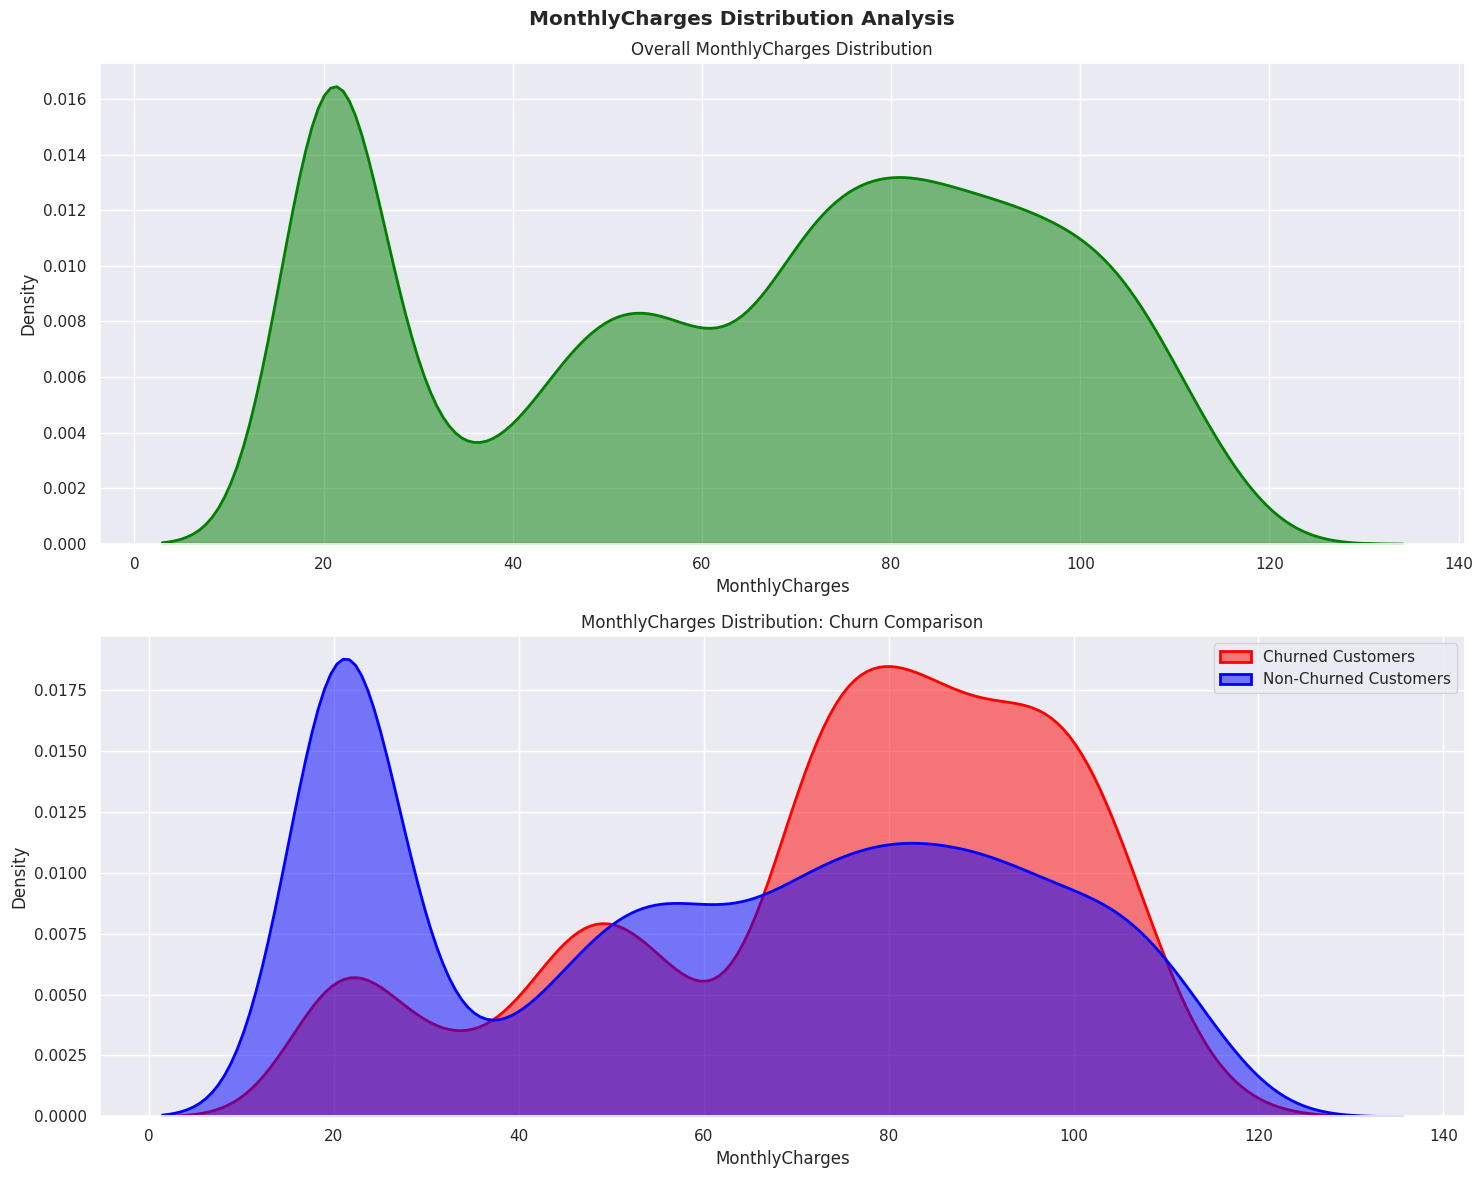

In [106]:
numerical_distribution('MonthlyCharges')

### Monthly Charges Analysis

#### Key Statistical Insights

1. **Average Monthly Charges**
   - Overall: $64.76
   - Churned Customers: $74.44
   - Non-Churned Customers: $61.27

2. **Median Monthly Charges**
   - Overall: $70.35
   - Churned Customers: $79.65
   - Non-Churned Customers: $64.43

### Detailed Interpretation

#### Pricing and Churn Correlation
- Churned customers pay ~21% more on average
- Higher monthly charges strongly correlate with increased likelihood of churn

#### Distribution Characteristics
- Wide range of monthly charges: $18.25 - $118.75
- Significant variability in pricing structure

### Churn Risk Factors

1. **Price Sensitivity**
   - Customers paying higher monthly rates more likely to leave
   - Potential indicators:
     * Perceived value not matching cost
     * Competitive market alternatives
     * Service quality concerns

2. **Pricing Tiers**
   - 25th percentile for churned: $56.15
   - 25th percentile for non-churned: $25.10
   - Dramatic difference in lower-tier pricing experiences

### Recommended Strategies

1. **Pricing Optimization**
   - Develop more competitive pricing tiers
   - Create value-added packages at different price points
   - Implement flexible pricing models

2. **Value Demonstration**
   - Clearly communicate service value
   - Provide detailed breakdowns of service benefits
   - Offer transparent pricing comparisons

3. **Retention Interventions**
   - Proactive outreach for customers in higher price brackets
   - Develop targeted retention programs
   - Create loyalty discounts or bundled services

4. **Segmented Approach**
   - Analyze pricing sensitivity across different customer segments
   - Customize offerings based on customer profiles

#### Tenure vs Monthly charges

Let's check is there any relationship between Tenure and MonthlyCharges. From the analysis, we can see that there are some clusters related to churn based on tenure and monthly charges.

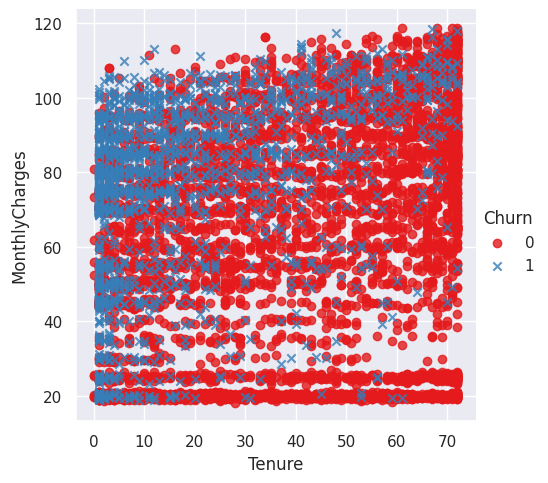

In [107]:
sns.lmplot(x='Tenure',y='MonthlyCharges',data=df_cal
               ,hue='Churn'
               ,fit_reg=False
               ,markers=["o", "x"]
               ,palette="Set1"
          )
plt.show() # from output, we can see that there are some clusters

#### K-means clustering

Here, to see different kind of clusters, we are using K-means cluster method. Before passing data to K-means algorithm, let's normalize Tenure and MonthlyCharges to Standard scale. 

In [111]:
import sklearn.preprocessing  as prepro
# normalized tenure and monthlycharges

df_cal['Tenure_norm'] = prepro.StandardScaler().fit_transform(df_cal[['Tenure']])
df_cal['MonthlyCharges_norm'] = prepro.StandardScaler().fit_transform(df_cal[['MonthlyCharges']])
df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted,AnyInternetService,Tenure_norm,MonthlyCharges_norm,Cluster
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,Electronic check,29.85,29.85,0,1,0,1,-1.277445,-1.160323,-1
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,Mailed check,56.95,1889.50,0,1,1,1,0.066327,-0.259629,-1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,Mailed check,53.85,108.15,1,1,0,1,-1.236724,-0.362660,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,Bank transfer (automatic),42.30,1840.75,0,1,1,1,0.514251,-0.746535,-1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,Electronic check,70.70,151.65,1,1,0,0,-1.236724,0.197365,2


Text(0.5, 1.0, 'Elbow curve')

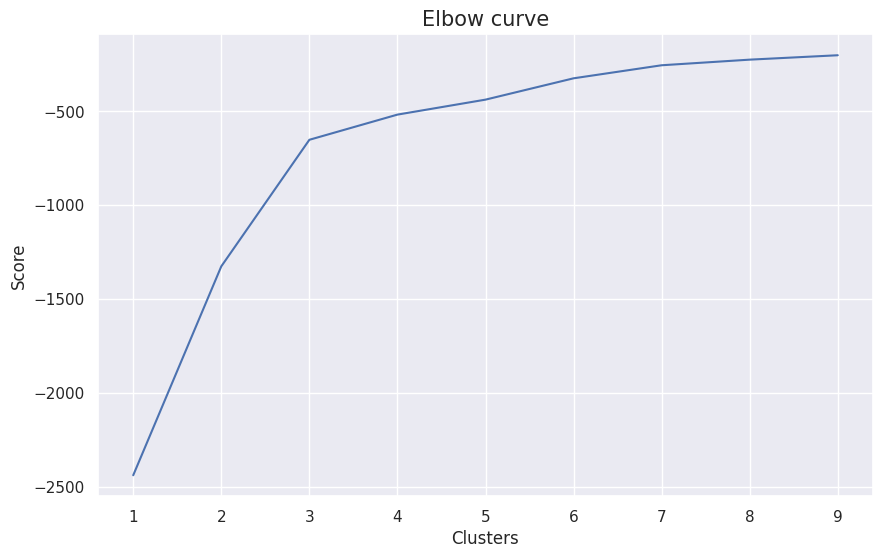

In [112]:
# checking number of clusters

from sklearn.cluster import KMeans

df_kmeans_data = df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']]

k = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in k]

score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]

plt.figure(figsize=(10,6))
plt.plot(k,score)
plt.xlabel("Clusters")
plt.ylabel("Score")
plt.title("Elbow curve",fontsize=15)

# Using Elbrow curve method, 3 looks more resonable

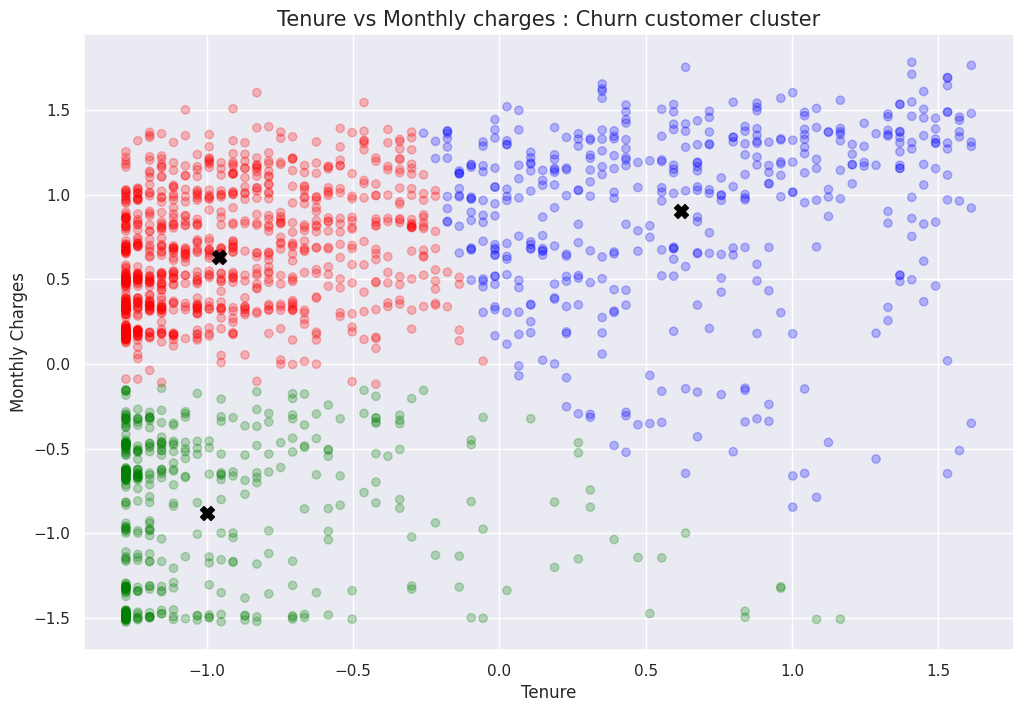

In [113]:
df_cal['Cluster'] = -1 # by default set Cluster to -1

kmeans = KMeans(n_clusters=3 # No of cluster in data
                , random_state = 2 # Selecting same training data
               ) 

kmeans.fit(df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']])
kmean_colors = ['green' if c == 0 else 'blue' if c == 1 else 'red' for c in kmeans.labels_]

df_cal.loc[(df_cal.Churn==1),'Cluster'] = kmeans.fit_predict(df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']])


fig = plt.figure(figsize=(12,8))
plt.scatter(x='Tenure_norm'
            , y='MonthlyCharges_norm'
            , data=df_cal[df_cal.Churn==1] 
            , color=kmean_colors # color of data points
            , alpha=0.25 # transparancy of data points
           )

plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")

plt.scatter(x=kmeans.cluster_centers_[:,0]
            , y=kmeans.cluster_centers_[:,1]
            , color='black'
            , marker='X' # Marker sign for data points
            , s=100 # marker size
           )
plt.title("Tenure vs Monthly charges : Churn customer cluster",fontsize=15)
plt.show()

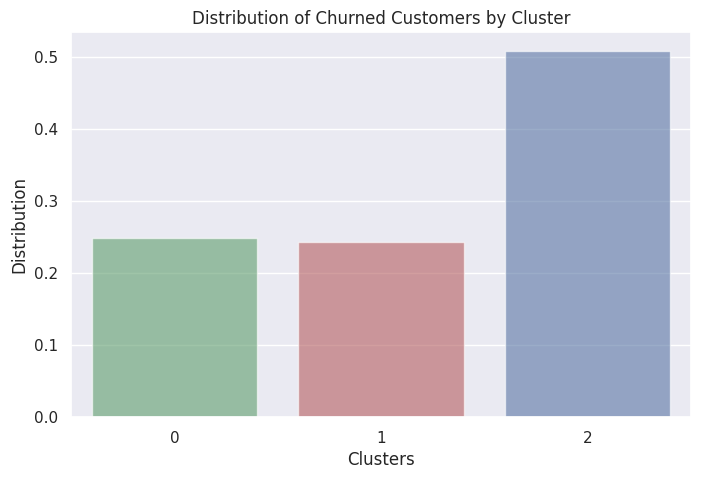

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get cluster distribution for churned customers
cluster_distribution = df_cal[df_cal['Churn'] == 1]['Cluster'].value_counts(normalize=True)

# Convert to DataFrame for proper Seaborn handling
cluster_df = cluster_distribution.reset_index()
cluster_df.columns = ['Cluster', 'Percentage']

# Define colors for clusters
colors = {0: 'g', 1: 'r', 2: 'b'}  # Green, Red, Blue

# Create the bar plot with proper hue mapping
plt.figure(figsize=(8, 5))
sns.barplot(
    data=cluster_df,
    x='Cluster',
    y='Percentage',
    hue='Cluster',  # Assign x to hue
    palette=colors,  # Use dictionary mapping
    alpha=0.6,
    legend=False  # Hide legend since color represents x-axis
)

# Set labels and title
plt.xlabel("Clusters")
plt.ylabel("Distribution")
plt.title("Distribution of Churned Customers by Cluster")

# Show plot
plt.show()


There are three types of customer group , who are more likely to churn<br>
1) Low tenure and high monthly charges<br>
2) High tenure and High monthly charges<br>
3) Low tenure and low monthly charges

In [118]:
df_cluster_gp = df_cal[df_cal['Churn'] == 1].groupby('Cluster')

print(df_cluster_gp[['Tenure', 'MonthlyCharges']].mean())


            Tenure  MonthlyCharges
Cluster                           
0         7.808602       38.329140
1        47.592511       91.855837
2         8.805263       83.795000


Let's analyse characteristics of different clusters based on information available in dataset.

In [119]:
def cluster_analysis(df,cluster_gp,feature):
    group_gp = cluster_gp[feature].value_counts(normalize=True).to_frame()

    #pd.concat([group_gp.index.name , group_gp.values])
    group_gp.columns = ['Percentage']
    group_gp = group_gp.reset_index()
    group_gp_new = group_gp.copy()  
    return (df.groupby('Churn')[feature].value_counts(normalize=True), group_gp_new)

### Demographic analysis by cluster

Here, we have gender, age bands (in terms of married, have children and senior citizen) related information. 


In [120]:
(gender_dist , gender_cluster_cnt) = cluster_analysis(df_cal,df_cluster_gp,'Gender')
print(gender_dist)
print(gender_cluster_cnt)

Churn  Gender
0      Male      0.507344
       Female    0.492656
1      Female    0.502408
       Male      0.497592
Name: proportion, dtype: float64
   Cluster  Gender  Percentage
0        0    Male    0.535484
1        0  Female    0.464516
2        1    Male    0.519824
3        1  Female    0.480176
4        2  Female    0.531579
5        2    Male    0.468421


Based on above information,

1) Cluster 0 - Less tenure and high monthly charges
    - More likely to be Female
2) Cluster 1 -  High tenure and High monthly charges
    - More likely to be male
3) Cluster 2 - Less tenure and low monthly charges
    - More likely to be male 

In [121]:
(seniorCitizen_dist,seniorCitizen_cluster_cnt) = cluster_analysis(df_cal,df_cluster_gp,'SeniorCitizen')
print(seniorCitizen_dist)
print(seniorCitizen_cluster_cnt)

Churn  SeniorCitizen
0      0                0.871279
       1                0.128721
1      0                0.745318
       1                0.254682
Name: proportion, dtype: float64
   Cluster  SeniorCitizen  Percentage
0        0              0    0.862366
1        0              1    0.137634
2        1              0    0.667401
3        1              1    0.332599
4        2              0    0.725263
5        2              1    0.274737


Based on above information,

1) Cluster 0 - Less tenure and high monthly charges
    - More likely to be Female and seniro citizen
2) Cluster 1 -  High tenure and High monthly charges
    - More likely to be male and senior citizen
3) Cluster 2 - Less tenure and low monthly charges
    - More likely to be male 

Same thing we can do for partner and depdendent variable.

### Usage analysis


Usage related information


Phone service : <br>

PhoneService - Have phone service or not?
MultipleLines - If have phone service then multiplelines service or not?

Internet service : <br>

InternetServiceType - Have internet service or not?<br>
OnlineSecurity - If have internet service, then have Online security service?<br>
OnlineBackup - If have internet service, then have Online backup service?<br>
DeviceProtection - If have internet service, then have Device Protection service?<br>
TechSupport - If have internet service, then have Tech support service?<br>
StreamingTV - If have internet service, then have TV Streaming service?<br>
StreamingMovies - If have internet service, then have Movie Streaming service?<br>


In [122]:
internet_dist,internet_cluster_cnt = cluster_analysis(df_cal,df_cluster_gp,'InternetService')
print(internet_dist)
print(internet_cluster_cnt)

Churn  InternetService
0      1                  0.726904
       0                  0.273096
1      1                  0.939540
       0                  0.060460
Name: proportion, dtype: float64
   Cluster  InternetService  Percentage
0        0                1    0.756989
1        0                0    0.243011
2        1                1    1.000000
3        2                1    1.000000


Based on above information,

1) Cluster 0 - Less tenure and high monthly charges
    - More likely to be Female, seniro citizen and Internet service user
2) Cluster 1 -  High tenure and High monthly charges
    - More likely to be male, senior citizen and internet service user
3) Cluster 2 - Less tenure and low monthly charges
    - More likely to be male 

In [123]:
streamingMovies_Dist,streamingMovies_cluster_cnt = cluster_analysis(df_cal,df_cluster_gp,'StreamingMovies')
print(streamingMovies_Dist)
print(streamingMovies_cluster_cnt)

Churn  StreamingMovies
0      0                  0.630073
       1                  0.369927
1      0                  0.562333
       1                  0.437667
Name: proportion, dtype: float64
   Cluster  StreamingMovies  Percentage
0        0                0    0.862366
1        0                1    0.137634
2        1                1    0.729075
3        1                0    0.270925
4        2                0    0.554737
5        2                1    0.445263


Based on above information,

1) Cluster 0 - Less tenure and high monthly charges
    - More likely to be Female, seniro citizen and Internet service user
2) Cluster 1 -  High tenure and High monthly charges
    - More likely to be male, senior citizen, internet service user and streaming movies service
3) Cluster 2 - Less tenure and low monthly charges
    - More likely to be male 

In [124]:
contract_Dist,contract_cluster_cnt = cluster_analysis(df_cal,df_cluster_gp,'ContractType')
print(contract_Dist)
print(contract_cluster_cnt)

Churn  ContractType  
0      Month-to-month    0.429068
       Two year          0.318322
       One year          0.252609
1      Month-to-month    0.885500
       One year          0.088818
       Two year          0.025682
Name: proportion, dtype: float64
   Cluster    ContractType  Percentage
0        0  Month-to-month    0.939785
1        0        One year    0.049462
2        0        Two year    0.010753
3        1  Month-to-month    0.625551
4        1        One year    0.279736
5        1        Two year    0.094714
6        2  Month-to-month    0.983158
7        2        One year    0.016842


Based on above information,

1) Cluster 0 - Less tenure and high monthly charges
    - More likely to be Female, seniro citizen,  Internet service user and month-to-month service
2) Cluster 1 -  High tenure and High monthly charges
    - More likely to be male, senior citizen, internet service user and streaming movies service
3) Cluster 2 - Less tenure and low monthly charges
    - More likely to be male and month-to-month service

In [125]:
billing_Dist,billing_cluster_cnt = cluster_analysis(df_cal,df_cluster_gp,'PaperlessBilling')
print(billing_Dist)
print(billing_cluster_cnt)

Churn  PaperlessBilling
0      1                   0.535562
       0                   0.464438
1      1                   0.749064
       0                   0.250936
Name: proportion, dtype: float64
   Cluster  PaperlessBilling  Percentage
0        0                 1    0.565591
1        0                 0    0.434409
2        1                 1    0.803965
3        1                 0    0.196035
4        2                 1    0.812632
5        2                 0    0.187368


Based on above information,

1) Cluster 0 - Less tenure and high monthly charges
    - More likely to be Female, seniro citizen,  Internet service user, month-to-month service and paperlessbilling method
2) Cluster 1 -  High tenure and High monthly charges
    - More likely to be male, senior citizen, internet service user and streaming movies service and paperlessbilling method
3) Cluster 2 - Less tenure and low monthly charges
    - More likely to be male and month-to-month service

In [126]:
payment_Dist,payment_cluster_cnt = cluster_analysis(df_cal,df_cluster_gp,'PaymentMethod')
print(payment_Dist)
print(payment_cluster_cnt)

Churn  PaymentMethod            
0      Mailed check                 0.252029
       Electronic check             0.250097
       Credit card (automatic)      0.249324
       Bank transfer (automatic)    0.248550
1      Electronic check             0.573034
       Mailed check                 0.164794
       Bank transfer (automatic)    0.138042
       Credit card (automatic)      0.124131
Name: proportion, dtype: float64
    Cluster              PaymentMethod  Percentage
0         0           Electronic check    0.402151
1         0               Mailed check    0.380645
2         0    Credit card (automatic)    0.113978
3         0  Bank transfer (automatic)    0.103226
4         1           Electronic check    0.528634
5         1    Credit card (automatic)    0.215859
6         1  Bank transfer (automatic)    0.211454
7         1               Mailed check    0.044053
8         2           Electronic check    0.677895
9         2  Bank transfer (automatic)    0.120000
10        2  

Based on above information,

1) Cluster 0 - Less tenure and high monthly charges
    - More likely to be Female, seniro citizen,  Internet service user, month-to-month service, paperlessbilling method and Elextronic check payment mothod
2) Cluster 1 -  High tenure and High monthly charges
    - More likely to be male, senior citizen, internet service user and streaming movies service and paperlessbilling method and Credit card (automatic)/Bank transfer(automatic) payment mothod
3) Cluster 2 - Less tenure and low monthly charges
    - More likely to be male and month-to-month service and Mailed check payment method

In [132]:
def cluster_tenure_charges_cal(df, tenure_charges_gp, feature, clusters):
    df_cluster_gender_gp = tenure_charges_gp.groupby(['Cluster', feature], as_index=False)
    
    # FIX: Use a list for selecting multiple columns
    tenure_charges_gp = df_cluster_gender_gp[['Tenure', 'MonthlyCharges']].mean()
    
    tenure_charges_gp['Category'] = feature
    tenure_charges_gp_final = pd.DataFrame()

    for cluster, value in clusters:
        temp = tenure_charges_gp[(tenure_charges_gp['Cluster'] == cluster) & (tenure_charges_gp[feature] == value)]
        tenure_charges_gp_final = pd.concat([tenure_charges_gp_final, temp])

    return pd.concat([df, tenure_charges_gp_final])


In [133]:
# let's calculate tenure and monthly chages for further visualization
churn_subs = df_cal[df_cal['Churn']==1]
tenure_charges_gp = pd.DataFrame()

tenure_charges_gp = cluster_tenure_charges_cal(tenure_charges_gp,churn_subs,"Gender",[(0,'Female'),(1,'Male'),(2,'Male')])
tenure_charges_gp = cluster_tenure_charges_cal(tenure_charges_gp,churn_subs,"SeniorCitizen",[(0,1),(1,1)])
tenure_charges_gp = cluster_tenure_charges_cal(tenure_charges_gp,churn_subs,"StreamingMovies",[(1,1)])
tenure_charges_gp = cluster_tenure_charges_cal(tenure_charges_gp,churn_subs,"PaperlessBilling",[(0,1),(1,1)])
tenure_charges_gp = cluster_tenure_charges_cal(tenure_charges_gp,churn_subs,"ContractType",[(0,'Month-to-month'),(2,'Month-to-month')])
tenure_charges_gp = cluster_tenure_charges_cal(tenure_charges_gp,churn_subs,"PaymentMethod",[(0,'Electronic check'),(1,'Credit card (automatic)'),(1,'Bank transfer (automatic)'),(2,'Mailed check')])
tenure_charges_gp

,Cluster,Gender,Tenure,MonthlyCharges,Category,SeniorCitizen,StreamingMovies,PaperlessBilling,ContractType,PaymentMethod
0,0,Female,7.902778,37.766898,Gender,NaN,NaN,NaN,NaN,NaN
3,1,Male,49.254237,92.209958,Gender,NaN,NaN,NaN,NaN,NaN
5,2,Male,9.186517,84.169326,Gender,NaN,NaN,NaN,NaN,NaN
1,0,NaN,8.375000,38.311719,SeniorCitizen,1.0,NaN,NaN,NaN,NaN
3,1,NaN,46.033113,92.034768,SeniorCitizen,1.0,NaN,NaN,NaN,NaN
3,1,NaN,48.888218,96.104985,StreamingMovies,NaN,1.0,NaN,NaN,NaN
1,0,NaN,7.790875,40.301901,PaperlessBilling,NaN,NaN,1.0,NaN,NaN
3,1,NaN,47.252055,92.774521,PaperlessBilling,NaN,NaN,1.0,NaN,NaN
0,0,NaN,6.588101,38.617620,ContractType,NaN,NaN,NaN,Month-to-month,NaN
6,2,NaN,8.663812,83.756959,ContractType,NaN,NaN,NaN,Month-to-month,NaN


In [136]:
def cluster_visualization_df(df, tenure_charges_gp, feature, marker, marker_index, color):
    tenure_charges_gp = tenure_charges_gp[tenure_charges_gp['Category'] == feature]
    
    # ✅ Check if "Label" exists before using it
    if 'Label' in tenure_charges_gp.columns:
        labels_unique = tenure_charges_gp.loc[tenure_charges_gp['Category'] == feature, 'Label'].unique()
        if len(labels_unique) > 0 and labels_unique[0] == 1:
            label = [feature for _ in range(len(tenure_charges_gp.Tenure.values))]
        else:
            label = tenure_charges_gp.loc[tenure_charges_gp['Category'] == feature, 'Label'].values
    else:
        # If "Label" column is missing, default to feature name
        label = [feature for _ in range(len(tenure_charges_gp.Tenure.values))]

    # ✅ Use pd.concat() instead of append() (append is deprecated)
    df_new = pd.DataFrame({
        "Cluster": tenure_charges_gp.Cluster.values,
        "Label": label,
        "Category": [feature for _ in range(len(tenure_charges_gp.Tenure.values))],
        "Tenure": tenure_charges_gp.Tenure.values,
        "MonthlyCharges": tenure_charges_gp.MonthlyCharges.values,
        "Marker": [marker for _ in range(len(tenure_charges_gp.Tenure.values))],
        "Marker_index": [marker_index for _ in range(len(tenure_charges_gp.Tenure.values))],
        "Color": [color for _ in range(len(tenure_charges_gp.Tenure.values))]
    })

    df = pd.concat([df, df_new], ignore_index=True)
    return df


In [137]:
cluster_visualize_gp = pd.DataFrame()
cluster_visualize_gp = cluster_visualization_df(cluster_visualize_gp,tenure_charges_gp,'Gender','+',[2,-1],'#1f77b4')
cluster_visualize_gp = cluster_visualization_df(cluster_visualize_gp,tenure_charges_gp,'SeniorCitizen','o',[-8,1.5],'#ff7f0e')
cluster_visualize_gp = cluster_visualization_df(cluster_visualize_gp,tenure_charges_gp,'StreamingMovies','^',[2,-1],'#2ca02c')
cluster_visualize_gp = cluster_visualization_df(cluster_visualize_gp,tenure_charges_gp,'PaperlessBilling','*',[-10,-2],'#d62728')
cluster_visualize_gp = cluster_visualization_df(cluster_visualize_gp,tenure_charges_gp,'ContractType','v',[-9,0.5],'#7f7f7f')
cluster_visualize_gp = cluster_visualization_df(cluster_visualize_gp,tenure_charges_gp,'PaymentMethod','>',[2,-1],'black')
cluster_visualize_gp

,Cluster,Label,Category,Tenure,MonthlyCharges,Marker,Marker_index,Color
0,0,Gender,Gender,7.902778,37.766898,+,"[2, -1]",#1f77b4
1,1,Gender,Gender,49.254237,92.209958,+,"[2, -1]",#1f77b4
2,2,Gender,Gender,9.186517,84.169326,+,"[2, -1]",#1f77b4
3,0,SeniorCitizen,SeniorCitizen,8.375000,38.311719,o,"[-8, 1.5]",#ff7f0e
4,1,SeniorCitizen,SeniorCitizen,46.033113,92.034768,o,"[-8, 1.5]",#ff7f0e
5,1,StreamingMovies,StreamingMovies,48.888218,96.104985,^,"[2, -1]",#2ca02c
6,0,PaperlessBilling,PaperlessBilling,7.790875,40.301901,*,"[-10, -2]",#d62728
7,1,PaperlessBilling,PaperlessBilling,47.252055,92.774521,*,"[-10, -2]",#d62728
8,0,ContractType,ContractType,6.588101,38.617620,v,"[-9, 0.5]",#7f7f7f
9,2,ContractType,ContractType,8.663812,83.756959,v,"[-9, 0.5]",#7f7f7f


Text(0.5, 1.0, 'Tenure vs Monthly charges demographic distribution')

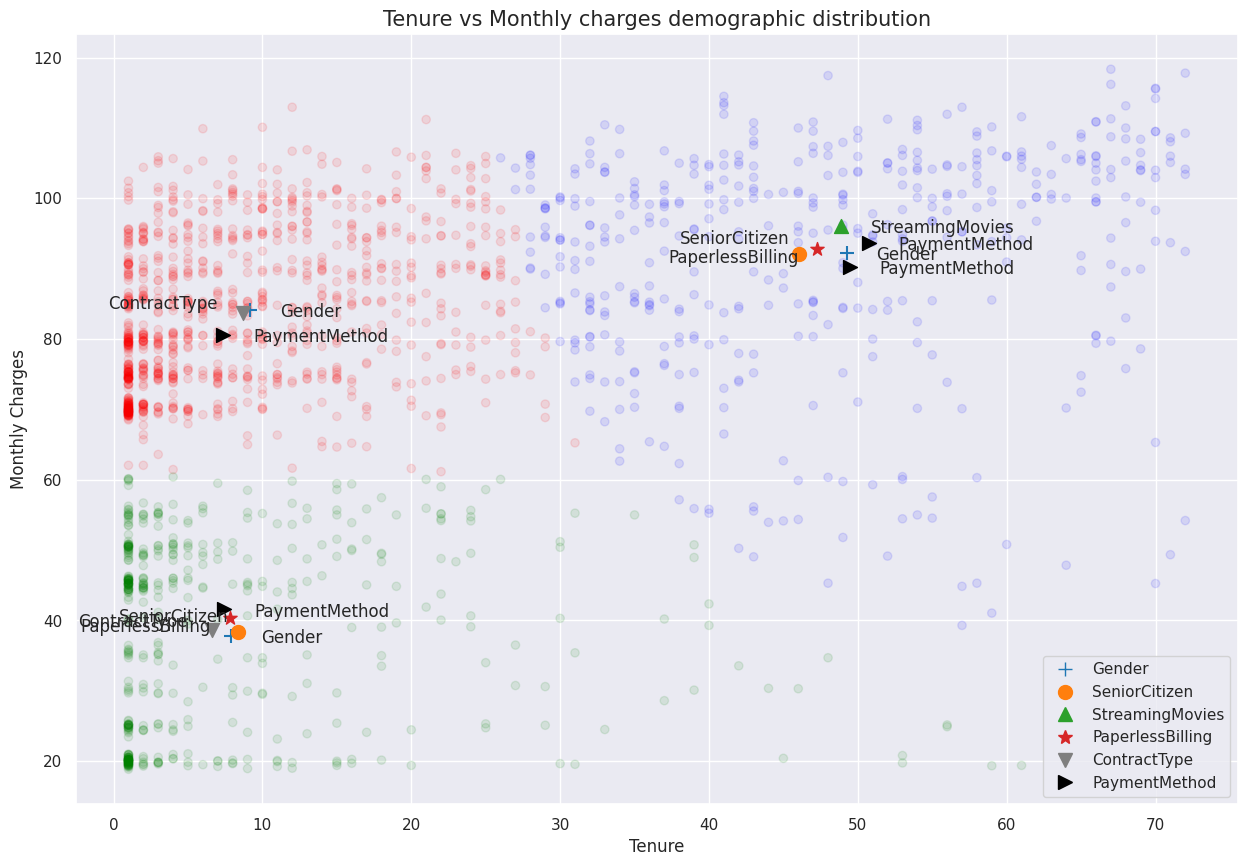

In [140]:
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(x='Tenure'
            , y='MonthlyCharges'
            , data=df_cal[df_cal.Churn==1] 
            , color=kmean_colors # color of data points
            , alpha=0.10 # transparancy of data points
           )

for i,kind in enumerate(cluster_visualize_gp['Marker']):
    ax.scatter(x=cluster_visualize_gp['Tenure'][i]
            , y=cluster_visualize_gp['MonthlyCharges'][i]
            , color=cluster_visualize_gp['Color'][i]
            , label = cluster_visualize_gp['Label'][i]
            , marker=kind # Marker sign for data points
            , s=100 # marker size
           )

category_color = cluster_visualize_gp[['Category','Color','Marker']].drop_duplicates().reset_index()
legend_list = []

for key,i in enumerate(category_color.Category.values):
    legend_list.append(mlines.Line2D([], [],color= category_color['Color'][key]
                  , marker= category_color['Marker'][key]
                  , linestyle= 'None'
                  , markersize= 10
                  , label= i))
    



for i,txt in enumerate(cluster_visualize_gp['Label']):
    ax.text(cluster_visualize_gp['Tenure'][i] + cluster_visualize_gp['Marker_index'][i][0]
            ,cluster_visualize_gp['MonthlyCharges'][i] + cluster_visualize_gp['Marker_index'][i][1]
            ,txt
            ,fontsize = 12
            )


plt.legend(handles=legend_list)
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.title("Tenure vs Monthly charges demographic distribution",fontsize=15)

## Conclusion

By exploring data, we came to know that features like Tenure, Monthly charges, Usage, Contract types, Payment methods are helpful to capture Churn customers. 

In next notebook, I have predicted Churn customer using Logistic regression and measure the outcome using different metrics.